In [1]:
import kagglehub
import pickle

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Herunterladen der Daten

# path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
# print("Path to dataset files:", path)

# Überblick Datensatz

In [4]:
# Einlesen der Daten als pandas Dataframe und Kopf ausgeben

df = pd.read_csv('diabetes_binary_5050split.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
df.shape
print(f'Der Datensatz besteht aus {df.shape[0]} Datensätzen und {df.shape[1]} Spalten.')

Der Datensatz besteht aus 70692 Datensätzen und 22 Spalten.


In [6]:
print('Spaltennamen:\n')
for i, column in enumerate(df.columns):
    print(i, column)

Spaltennamen:

0 Diabetes_binary
1 HighBP
2 HighChol
3 CholCheck
4 BMI
5 Smoker
6 Stroke
7 HeartDiseaseorAttack
8 PhysActivity
9 Fruits
10 Veggies
11 HvyAlcoholConsump
12 AnyHealthcare
13 NoDocbcCost
14 GenHlth
15 MentHlth
16 PhysHlth
17 DiffWalk
18 Sex
19 Age
20 Education
21 Income


In [7]:
# Überblick über Non-Null-Werte und Datentypen
# df.isnull().sum() # zeigt ebenfalls, dass es in jeder Spalte 0 Nullwerte gibt

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [14]:
# unique Werte ausgeben, viele Spalten mit boolschen Werten, wenige numerische Daten, davon bis auf BMI ordinale
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}:\n {unique_values}")

Diabetes_binary:
 [0. 1.]
HighBP:
 [1. 0.]
HighChol:
 [0. 1.]
CholCheck:
 [1. 0.]
BMI:
 [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Smoker:
 [0. 1.]
Stroke:
 [0. 1.]
HeartDiseaseorAttack:
 [0. 1.]
PhysActivity:
 [1. 0.]
Fruits:
 [0. 1.]
Veggies:
 [1. 0.]
HvyAlcoholConsump:
 [0. 1.]
AnyHealthcare:
 [1. 0.]
NoDocbcCost:
 [0. 1.]
GenHlth:
 [3. 1. 2. 4. 5.]
MentHlth:
 [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
PhysHlth:
 [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
DiffWalk:
 [0. 1.]
Sex:
 [1. 0.]
Age:
 [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5

In [16]:
# Datentypen umwandeln
bool_columns = ['Diabetes_binary','HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']
df[bool_columns] = df[bool_columns].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  bool   
 1   HighBP                70692 non-null  bool   
 2   HighChol              70692 non-null  bool   
 3   CholCheck             70692 non-null  bool   
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  bool   
 6   Stroke                70692 non-null  bool   
 7   HeartDiseaseorAttack  70692 non-null  bool   
 8   PhysActivity          70692 non-null  bool   
 9   Fruits                70692 non-null  bool   
 10  Veggies               70692 non-null  bool   
 11  HvyAlcoholConsump     70692 non-null  bool   
 12  AnyHealthcare         70692 non-null  bool   
 13  NoDocbcCost           70692 non-null  bool   
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [18]:
# Überblick, um ungewöhnliche Werte zu identifizieren
# die meisten Spalten haben boolsche Werte, weshalb eine Zusammenfassung für diese Spalten nicht sinnvoll ist
# ist es überhaupt sinnvoll für die Ordinalwerte?
df.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,29.856985,2.837082,3.752037,5.810417,8.584055,4.920953,5.698311
std,7.113954,1.113565,8.155627,10.062261,2.852153,1.029081,2.175196
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,25.000000,2.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,29.000000,3.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,33.000000,4.000000,2.000000,6.000000,11.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


## Auffällige BMI-Werte

In [21]:
# Ab einem Body Mass Index (BMI) von 25 spricht man bereits von Übergewicht. 
# Ab einem BMI von 30 spricht man von Adipositas. 
# Ab einem BMI von 30 liegt eine Adipositas Grad I vor, Adipositas Grad 2 beginnt bei einem BMI von 35. 
# Der dritte Adipositas-Grad von 40 ist auch bekannt als Adipositas permagna.

# Wert, der auffällig hoch ist
print(f'Maximalwert BMI: {max(df['BMI'])}')

# alle Datensätze mit BMI >= 40
print(f'Anzahl Datensätze mit BMI größer gleich 40: {df[df['BMI'] >= 40].shape[0]}')

Maximalwert BMI: 98.0
Anzahl Datensätze mit BMI größer gleich 40: 6031


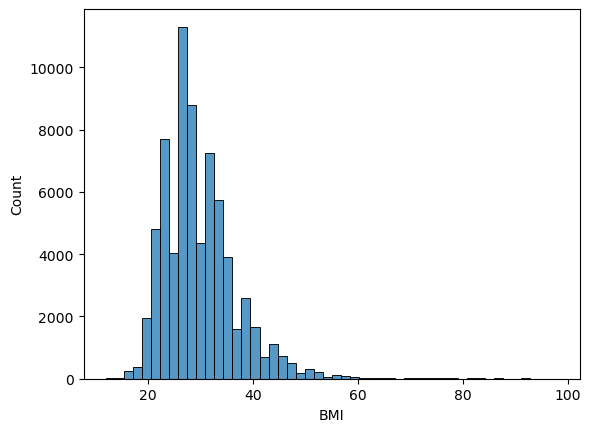

In [23]:
sns.histplot(data=df['BMI'], bins=50)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
# Rechtsschiefe Verteilung

## Verteilung der Werte der Zielspalte

In [26]:
# Verteilung unserer Zielspalte 'Diabetes_binary': 50:50
df['Diabetes_binary'].value_counts()

Diabetes_binary
False    35346
True     35346
Name: count, dtype: int64

## Analyse der Duplikate

In [29]:
print(f'Anzahl gefundener Duplikate: {df.duplicated().sum()}')
dupl_percent = (df.duplicated().sum() / len(df)) * 100
print(f'Anteil der Duplikate von den Gesamtdaten: {dupl_percent:.2f}%')

# Wir gehen davon aus, dass dies keine Duplikate sind. Es gibt keinen unique Identifier und anhand der Datentypen
# der Spalten ist es plausibel, dass es sich um zufällige Überschneidungen kleiner Wertkombinationen handeln könnte.
# Um aber Verzerrungen beim Training oder Test zu vermeiden, löschen wir diese Duplikate, da sie nur 2.31% des
# Gesamtdatensatzes ausmachen.
print()
print(f'Anzahl Datensätze mit Duplikaten: {df.shape[0]}')
df = df.drop_duplicates()
print(f'Anzahl der Datensätze ohne Duplikate: {df.shape[0]}')

Anzahl gefundener Duplikate: 1635
Anteil der Duplikate von den Gesamtdaten: 2.31%

Anzahl Datensätze mit Duplikaten: 70692
Anzahl der Datensätze ohne Duplikate: 69057


## Datenverteilung

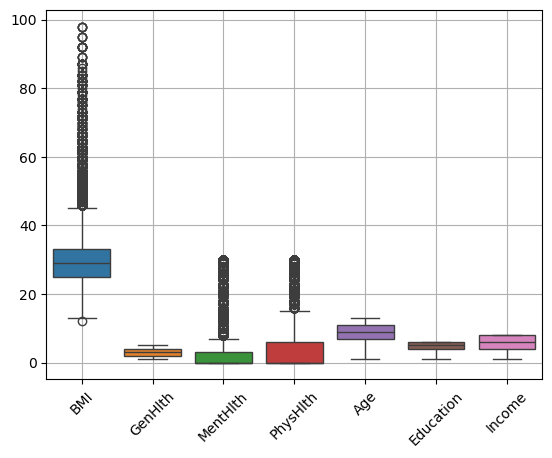

In [32]:
float64_columns = df.select_dtypes(include=['float64'])
# plt.figure(figsize=(12, 6))
sns.boxplot(data=float64_columns)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Korrelationen

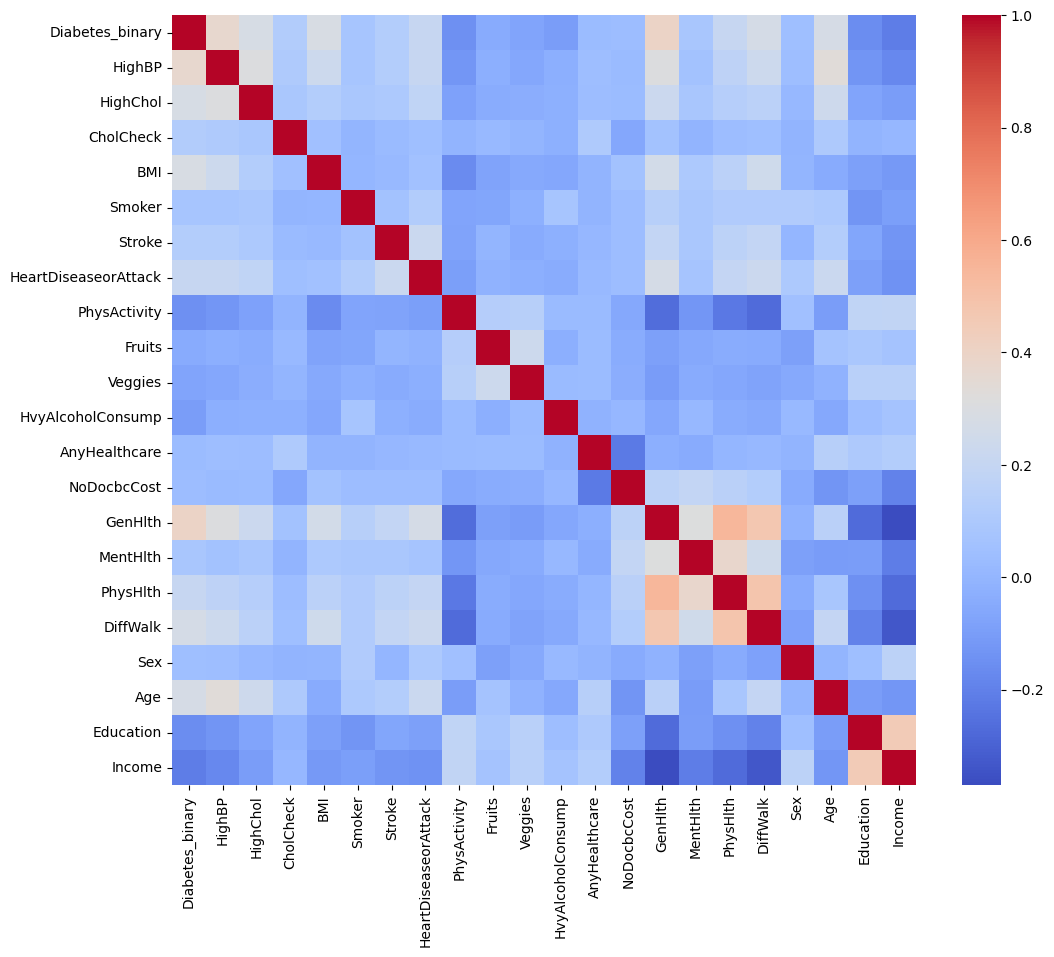

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

In [35]:
df_corr = df.corr()
df_corr['Diabetes_binary'].sort_values(ascending=False,key=np.abs)

# wichtigste Spalten für Voraussage von 'Diabetes_binary' laut Korrelation
# decken sich einigermaßen mit den wissenschaftlich vorausgesagten Faktoren -> Liste ergänzen?

Diabetes_binary         1.000000
GenHlth                 0.396571
HighBP                  0.372048
BMI                     0.285643
HighChol                0.281399
Age                     0.274550
DiffWalk                0.267082
Income                 -0.212846
HeartDiseaseorAttack    0.207229
PhysHlth                0.206868
Education              -0.158522
PhysActivity           -0.150281
Stroke                  0.122727
CholCheck               0.118900
HvyAlcoholConsump      -0.098709
MentHlth                0.080688
Smoker                  0.075853
Veggies                -0.072181
Fruits                 -0.044560
Sex                     0.042538
NoDocbcCost             0.036145
AnyHealthcare           0.027034
Name: Diabetes_binary, dtype: float64

## Eingegrenzte Features gegeneinander plotten

In [37]:
df_bool = df.select_dtypes(include=['bool'])

df_number = df.select_dtypes(include=['float64'])
df_number['Diabetes_binary'] = df['Diabetes_binary']

print(df_bool.head())
print(df_number.head())

   Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  Stroke  \
0            False    True     False       True   False   False   
1            False    True      True       True    True    True   
2            False   False     False       True   False   False   
3            False    True      True       True    True   False   
4            False   False     False       True    True   False   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                 False          True   False     True              False   
1                 False         False    True    False              False   
2                 False          True    True     True              False   
3                 False          True    True     True              False   
4                 False          True    True     True              False   

   AnyHealthcare  NoDocbcCost  DiffWalk    Sex  
0           True        False     False   True  
1           True        False     Fa

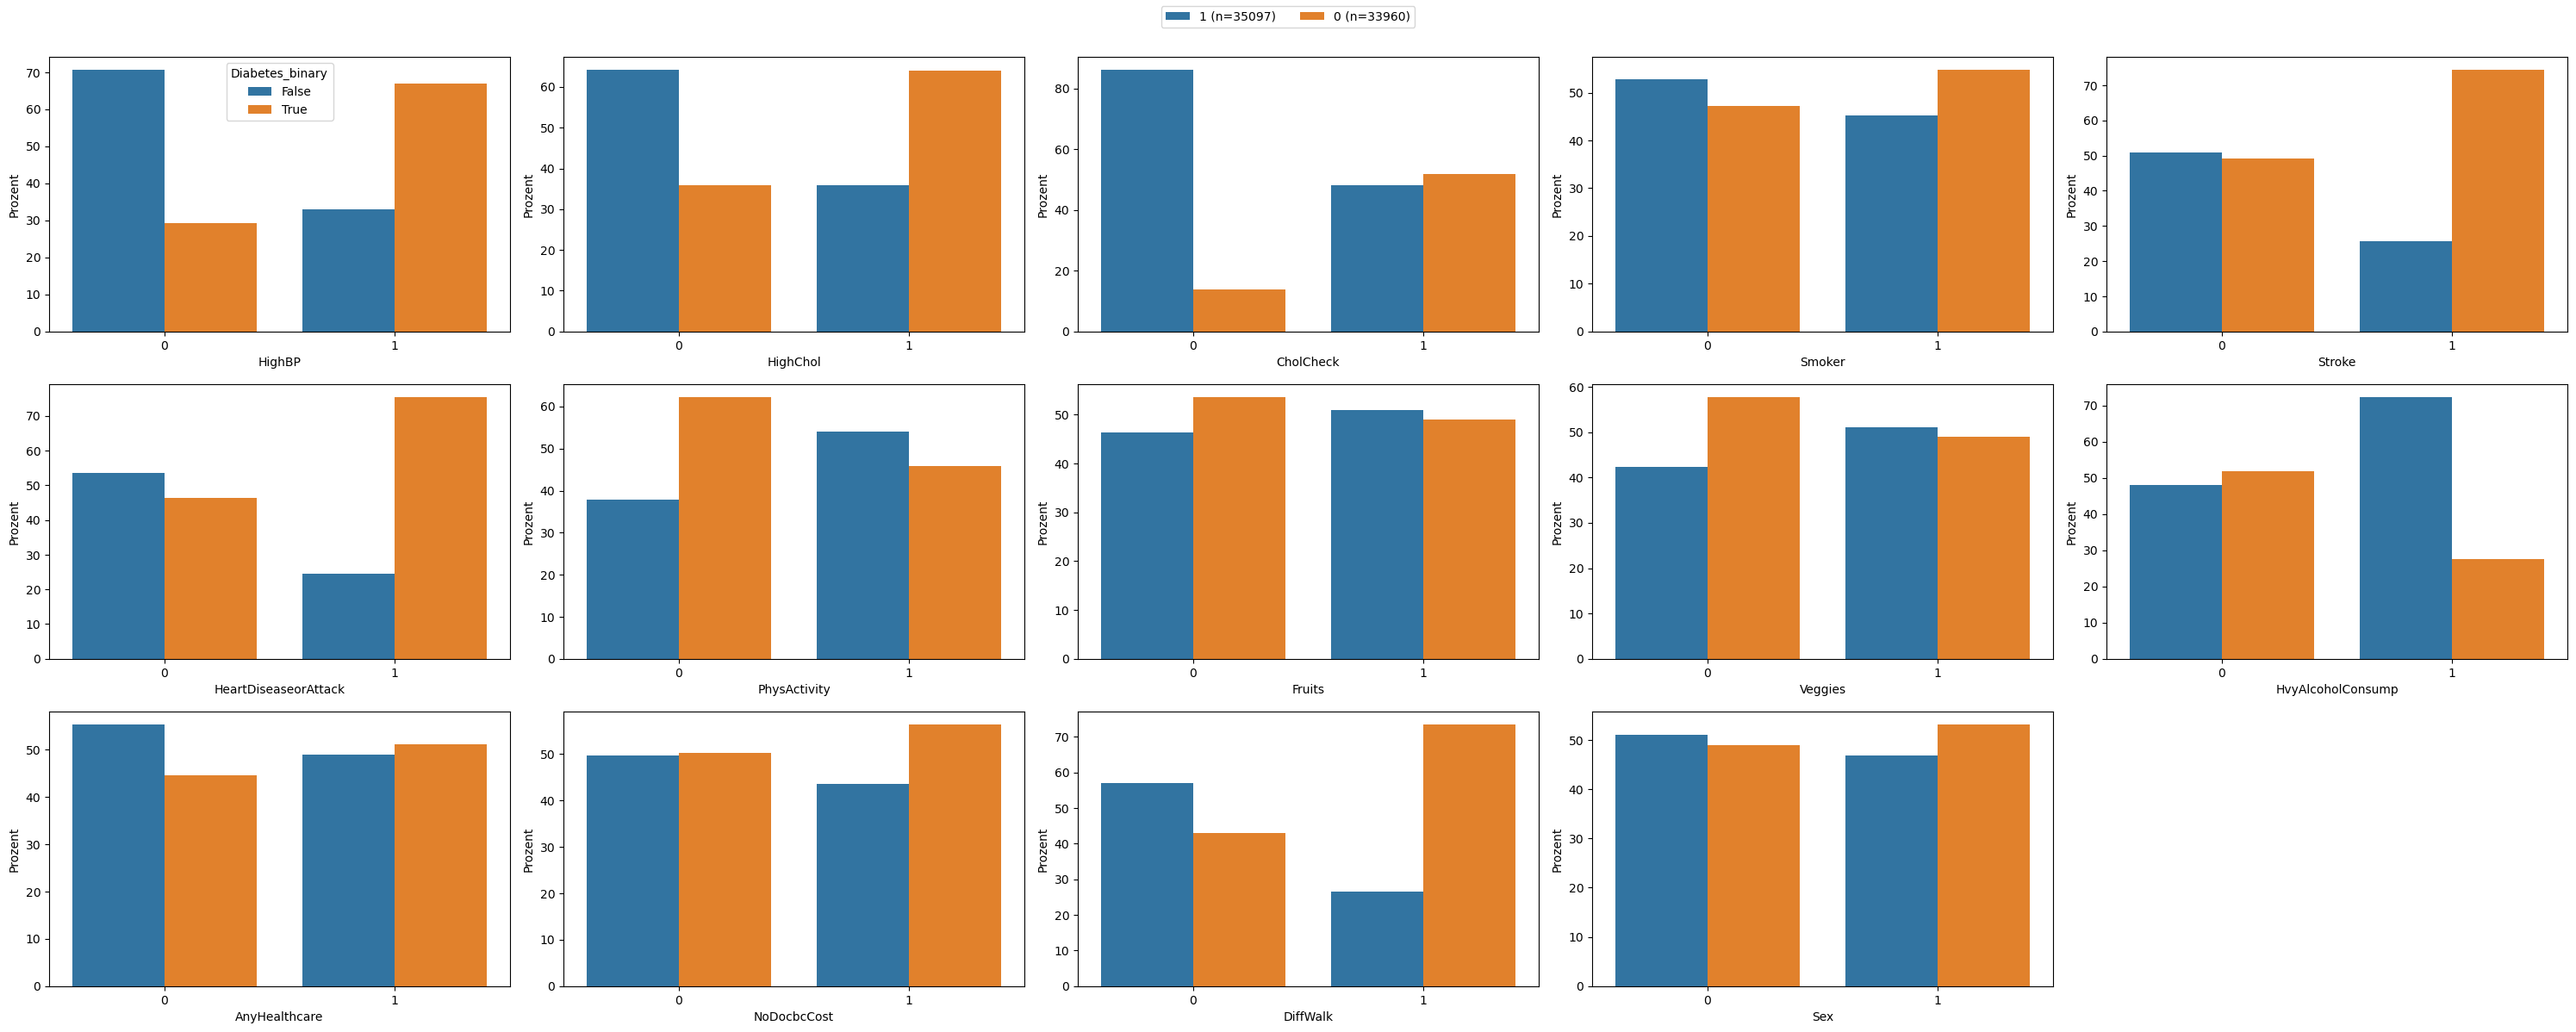

In [39]:
feature_cols = [col for col in df_bool.columns if col != 'Diabetes_binary']

n_cols = 5
n_rows = -(-len(feature_cols) // n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    data = df_bool[[col, 'Diabetes_binary']].copy()
    data = data.groupby([col, 'Diabetes_binary']).size().reset_index(name='count')
    total_per_col = data.groupby(col)['count'].transform('sum')
    data['percent'] = data['count'] / total_per_col * 100
    sns.barplot(data=data, x=col, y='percent', hue='Diabetes_binary')
    plt.ylabel("Prozent")
    plt.xticks([0, 1], ['0', '1'])

    plt.xlabel(col)
    plt.grid(False)
    if i != 0:
        plt.legend([], [], frameon=False)

# Gemeinsame Legende oben
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, [f"{int(k)} (n={v})" for k, v in df['Diabetes_binary'].value_counts().items()],
              loc='upper center', ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

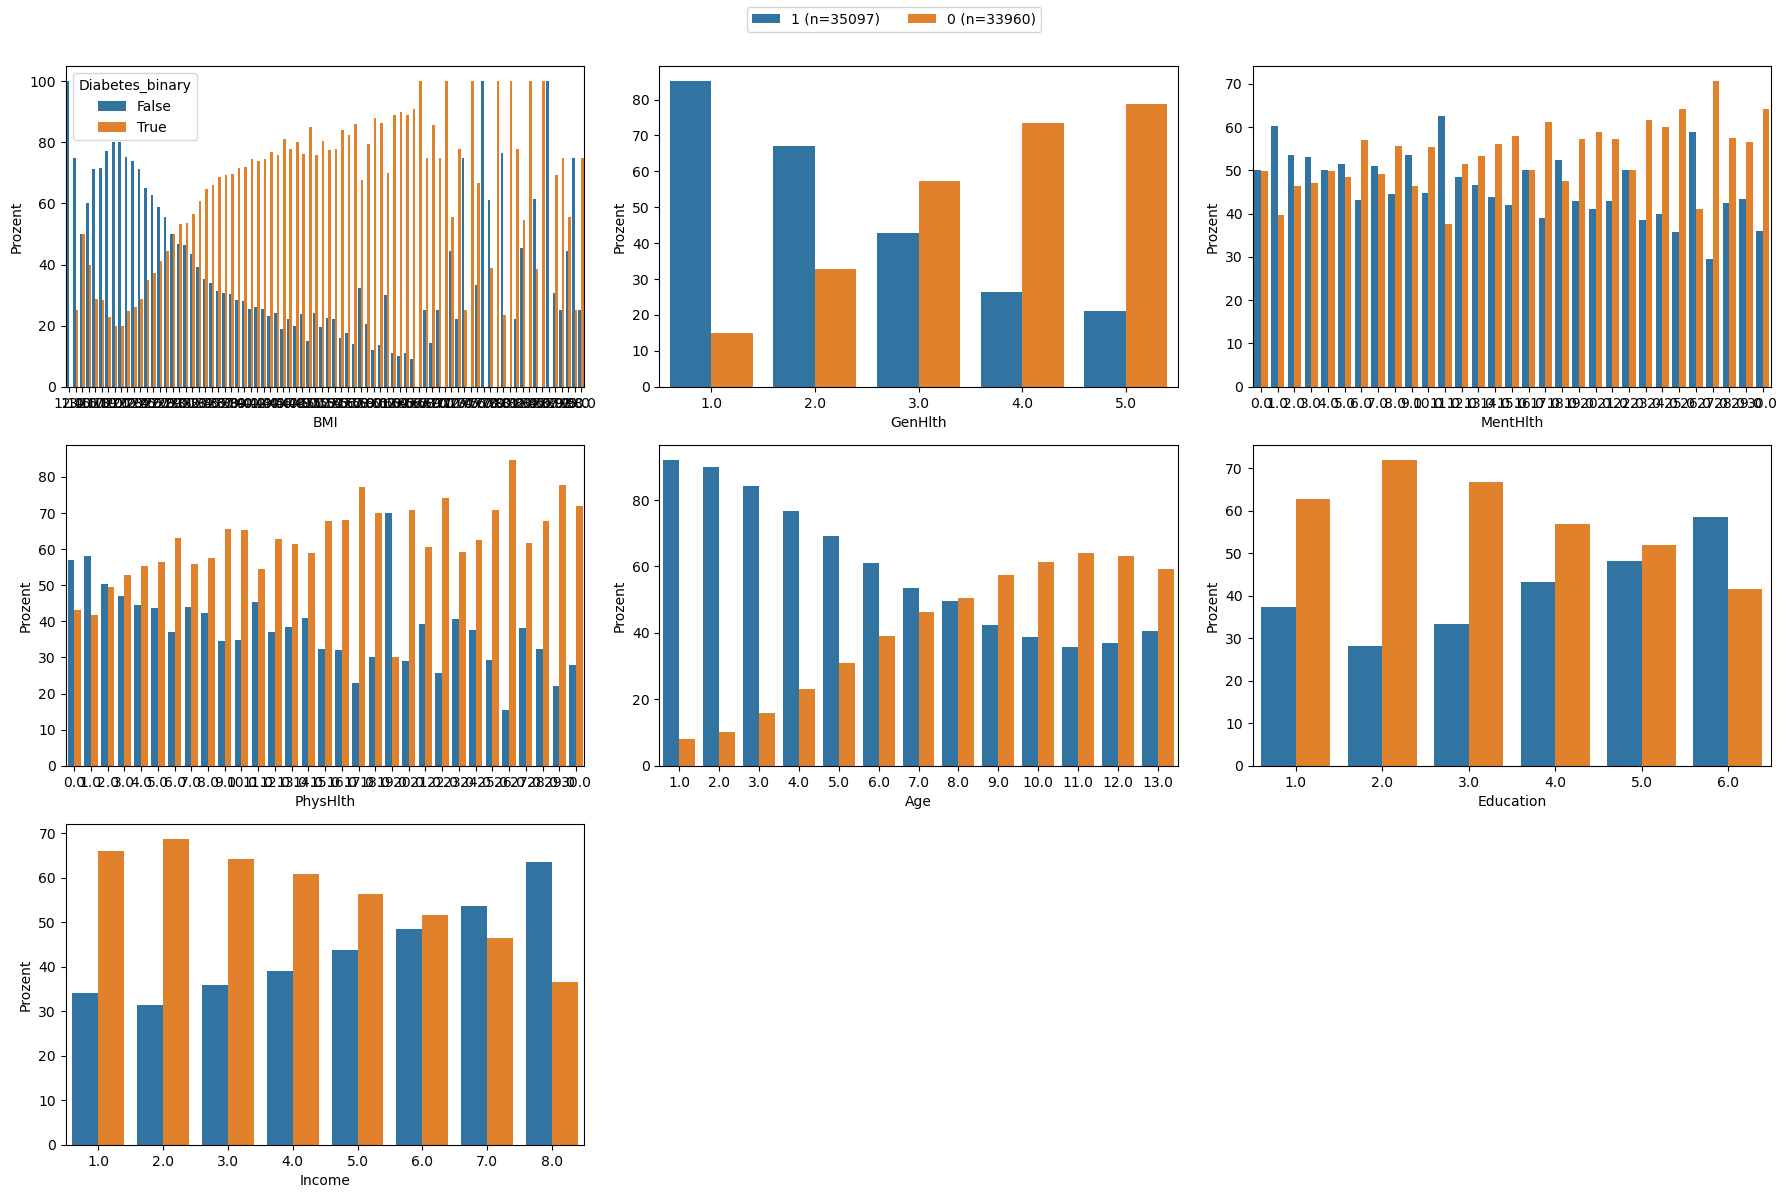

In [43]:
feature_cols = [col for col in df_number.columns if col != 'Diabetes_binary']

n_cols = 3
n_rows = -(-len(feature_cols) // n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    data = df_number[[col, 'Diabetes_binary']].copy()
    data = data.groupby([col, 'Diabetes_binary']).size().reset_index(name='count')
    total_per_group = data.groupby(col)['count'].transform('sum')
    data['percent'] = data['count'] / total_per_group * 100

    sns.barplot(data=data, x=col, y='percent', hue='Diabetes_binary')
    plt.ylabel("Prozent")

    plt.xlabel(col)
    plt.grid(False)
    if i != 0:
        plt.legend([], [], frameon=False)

# Gemeinsame Legende oben
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, [f"{int(k)} (n={v})" for k, v in df['Diabetes_binary'].value_counts().items()],
              loc='upper center', ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Datenvorbereitung

In [45]:
keep_features = ['BMI', 'HighBP', 'Age', 'PhysActivity', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'PhysHlth','GenHlth','Income']
drop_features = ['CholCheck','Smoker','Fruits','Veggies','AnyHealthcare','NoDocbcCost', 'MentHlth', 'HvyAlcoholConsump','Sex','Education']
print(f'Anzahl der Spalten gesamt: {len(keep_features)+len(drop_features)}')
df = df.drop(columns=drop_features)
df.head()

Anzahl der Spalten gesamt: 21


,Diabetes_binary,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Income
0,False,True,False,26.0,False,False,True,3.0,30.0,False,4.0,8.0
1,False,True,True,26.0,True,False,False,3.0,0.0,False,12.0,8.0
2,False,False,False,26.0,False,False,True,1.0,10.0,False,13.0,8.0
3,False,True,True,28.0,False,False,True,3.0,3.0,False,11.0,8.0
4,False,False,False,29.0,False,False,True,2.0,0.0,False,8.0,8.0


In [47]:
# Zielspalte abtrennen

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary'].copy()

print("Größe von X", X.shape)
print("Größe von y", y.shape)

Größe von X (69057, 11)
Größe von y (69057,)


In [48]:
# Abspeichern der vorbereiteten Daten mit pickle
with open('X.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [15]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_validate

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier, RandomForestClassifier 
from sklearn.cluster import DBSCAN

from scipy.stats import randint

# 1. Preprocessing

In [6]:
# Einlesen der pickle-Dateien
with open('X.pkl', 'rb') as f:
    X_pd = pickle.load(f)

with open('y.pkl', 'rb') as f:
    y_pd = pickle.load(f)

In [9]:
# in numpy umwandeln
X = X_pd.to_numpy()
y = y_pd.to_numpy()

print(f'Datensatz X: \n{X}')
print()
print(f'Zeilspalte y: \n{y}')

Datensatz X: 
[[True False 26.0 ... False 4.0 8.0]
 [True True 26.0 ... False 12.0 8.0]
 [False False 26.0 ... False 13.0 8.0]
 ...
 [True True 25.0 ... True 13.0 4.0]
 [True True 18.0 ... True 11.0 4.0]
 [True True 25.0 ... False 9.0 2.0]]

Zeilspalte y: 
[False False False ...  True  True  True]


In [11]:
# Daten in Trainings- und testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (55245, 11)
Shape y_train: (55245,)
Shape X_test: (13812, 11)
Shape y_test: (13812,)


In [13]:
X_train_pca = X_train.copy()
X_test_pca = X_test.copy()

pipe_pca_scale = Pipeline([
    ('pca', PCA(n_components=5)),
    ('st_scaler', StandardScaler())
])

X_train_pca = pipe_pca_scale.fit_transform(X_train_pca)
X_test_pca = pipe_pca_scale.transform(X_test_pca)

print(f'X_train mit PCA: \n{X_train_pca}')
print()
print(f'X_test mit PCA: \n{X_test_pca}')

X_train mit PCA: 
[[-0.69315061 -0.66837936  0.41416818  0.55430752 -0.36838262]
 [ 0.29981923 -0.69711076  1.31402789  1.10636198 -1.09427349]
 [-0.6074504  -0.22831991  0.03154239 -1.51561952  0.268059  ]
 ...
 [-0.61207471 -0.38599393  1.40807584 -1.24560173  1.18781749]
 [ 0.8530229  -0.387096   -0.52615473 -1.2129214   0.32780025]
 [-0.71304843 -0.64140514 -1.69862064  0.50663387  0.03019847]]

X_test mit PCA: 
[[-0.58507159  0.17023982  0.4002114   1.16715481 -1.37464632]
 [-0.65077769 -0.21762883 -1.63527938  0.53528434  0.27843721]
 [ 1.31745074 -0.56758091  1.28372139  0.89774523 -0.61951425]
 ...
 [ 0.35452508 -0.40009808  0.73348454  0.78976167  2.48665949]
 [ 0.69753464 -0.61120969 -2.59566378 -1.71683986 -0.37998996]
 [-0.5779292   0.33207495 -1.32803795  0.75637971 -1.36401926]]


# 2. Models

## 2.1 Logistic Regression

logreg_featselect:  [[ 0.72186086  0.59126245  0.53763772  0.18435396  0.29403928 -0.04433337
   0.56701428 -0.08673001  0.08103549  0.15966843 -0.0560634 ]]
logreg_featselectC1:  [[ 0.72217595  0.59064556  0.53738585  0.18040389  0.29459003 -0.04451271
   0.56580651 -0.08595101  0.0804439   0.15936052 -0.05650312]]
logreg_featselectC01:  [[ 0.71955686  0.58709828  0.53613202  0.16541063  0.29072052 -0.0447841
   0.56055135 -0.08105507  0.07466629  0.15830073 -0.05836135]]
logreg_featselectC001:  [[ 0.69458963  0.55318314  0.52473206  0.02247453  0.25339245 -0.04741498
   0.51019535 -0.03333434  0.01833903  0.14826093 -0.07646942]]
                 Feature  Keine Regularisierung (newton-cg)  L1, C=1.0  \
0                 HighBP                           0.721861   0.722176   
1               HighChol                           0.591262   0.590646   
2                    BMI                           0.537638   0.537386   
3                 Stroke                           0.184354   0.

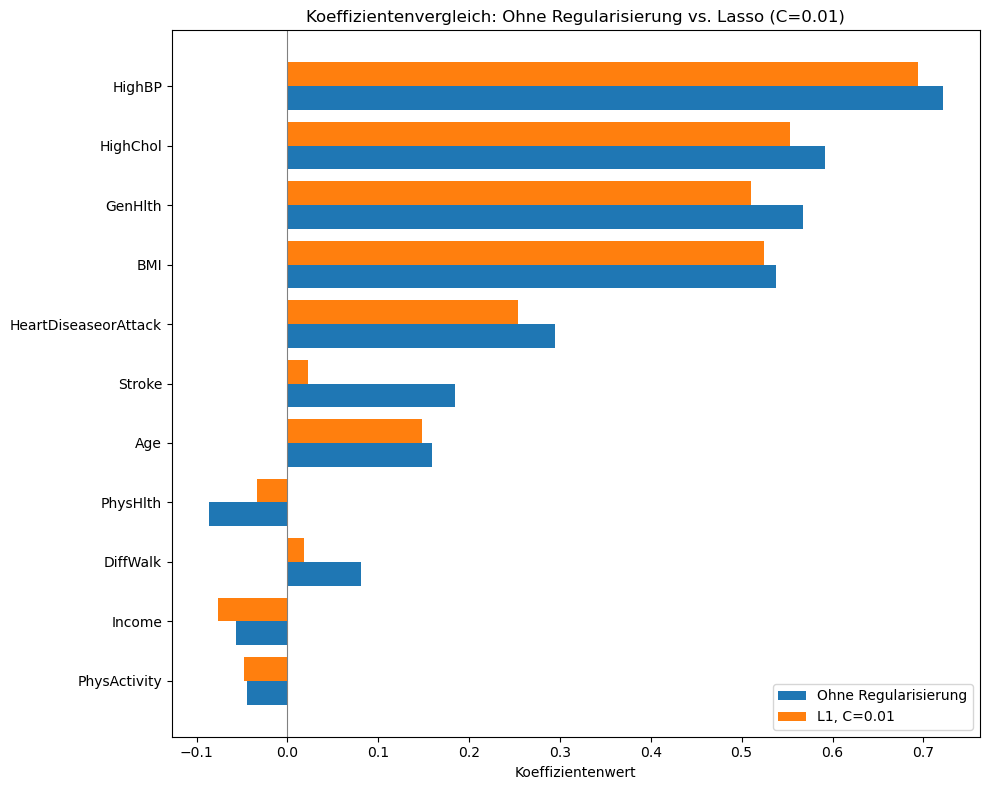

In [19]:
#DIESER ABSCHNITT DIENT LEDIGLICH DER VORBEREITUNG UND DEM PLOTTEN UND DEM ERSTELLEN VON TABELLEN 
# EINZIGER MEHRWERT HIER: TABELLEN UND PLOTS; ALLE WEITEREN INFORMATIONEN SIND UNTEN NOCHMAL ZU FINDEN


#********** Skalierung*********
#********************************




X_train_scaled = X_train.copy()
cols_scale = [2,7]
scaler = StandardScaler()
X_train_scaled[:, cols_scale] = scaler.fit_transform(X_train_scaled[:, cols_scale])
X_test_scaled = X_test.copy()
X_test_scaled[:, cols_scale] = scaler.transform(X_test_scaled[:, cols_scale])




# ***** Feature Selection / Lasso Regularisierung *****
#*****************************************************
logreg_featselect= LogisticRegression(solver='newton-cg', max_iter=1000, random_state=42, penalty=None).fit(X_train_scaled, y_train)
print("logreg_featselect: ", logreg_featselect.coef_)

logreg_featselectC1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=1.0).fit(X_train_scaled, y_train)
print("logreg_featselectC1: ", logreg_featselectC1.coef_)

logreg_featselectC01 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=0.1).fit(X_train_scaled, y_train)
print("logreg_featselectC01: ", logreg_featselectC01.coef_)

logreg_featselectC001 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=0.01).fit(X_train_scaled, y_train)
print("logreg_featselectC001: ", logreg_featselectC001.coef_)

coef_comparison = pd.DataFrame({
    'Feature': X_pd.columns,
    'Keine Regularisierung (newton-cg)': logreg_featselect.coef_[0],
    'L1, C=1.0': logreg_featselectC1.coef_[0],
    'L1, C=0.1': logreg_featselectC01.coef_[0],
    'L1, C=0.01': logreg_featselectC001.coef_[0],
})

print(coef_comparison)

coef_comparison = pd.DataFrame({
    'Feature': X_pd.columns,
    'KeineReg (newton-cg)': logreg_featselect.coef_[0],
    'L1, C=0.01': logreg_featselectC001.coef_[0],
})

# Prozentänderung berechnen (Division durch 0 vermeiden)
percent_change = (
    (coef_comparison['L1, C=0.01'] - coef_comparison['KeineReg (newton-cg)']) 
    / coef_comparison['KeineReg (newton-cg)'].replace(0, np.nan)
) * 100

# Neue Spalte an dritter Stelle einfügen
coef_comparison.insert(
    3,  # Position der Spalte
    'Prozentänderung (%)',
    percent_change
)
print(coef_comparison)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Beispielhafte Vorbereitung (ersetzen durch deine echten Modelle)
coefs_none = logreg_featselect.coef_[0]         # Modell ohne Regularisierung (newton-cg)
coefs_lasso = logreg_featselectC001.coef_[0]    # Modell mit L1, C=0.01
features = X_pd.columns

# DataFrame für Sortierung nach Wichtigkeit im unregulierten Modell
coef_df = pd.DataFrame({
    'Feature': features,
    'Ohne Regularisierung': coefs_none,
    'L1, C=0.01': coefs_lasso
})


# Sortieren nach Einfluss der unregulierten Regression (optional: abs-Wert)
coef_df = coef_df.sort_values(by='Ohne Regularisierung', key=abs)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.4
indices = np.arange(len(coef_df))

ax.barh(indices - bar_width/2, coef_df['Ohne Regularisierung'], bar_width, label='Ohne Regularisierung')
ax.barh(indices + bar_width/2, coef_df['L1, C=0.01'], bar_width, label='L1, C=0.01')

ax.set_yticks(indices)
ax.set_yticklabels(coef_df['Feature'])
ax.set_xlabel('Koeffizientenwert')
ax.set_title('Koeffizientenvergleich: Ohne Regularisierung vs. Lasso (C=0.01)')
ax.axvline(0, color='grey', linewidth=0.8)
ax.legend()

plt.tight_layout()
plt.show()

logreg_featselect:  [[ 0.72186086  0.59126245  0.53763772  0.18435396  0.29403928 -0.04433337
   0.56701428 -0.08673001  0.08103549  0.15966843 -0.0560634 ]]
logreg_featselectC1:  [[ 0.72217595  0.59064556  0.53738585  0.18040389  0.29459003 -0.04451271
   0.56580651 -0.08595101  0.0804439   0.15936052 -0.05650312]]
logreg_featselectC01:  [[ 0.71955686  0.58709828  0.53613202  0.16541063  0.29072052 -0.0447841
   0.56055135 -0.08105507  0.07466629  0.15830073 -0.05836135]]
logreg_featselectC001:  [[ 0.69458963  0.55318314  0.52473206  0.02247453  0.25339245 -0.04741498
   0.51019535 -0.03333434  0.01833903  0.14826093 -0.07646942]]
                 Feature  Keine Regularisierung (newton-cg)  L1, C=1.0  \
0                 HighBP                           0.721861   0.722176   
1               HighChol                           0.591262   0.590646   
2                    BMI                           0.537638   0.537386   
3                 Stroke                           0.184354   0.

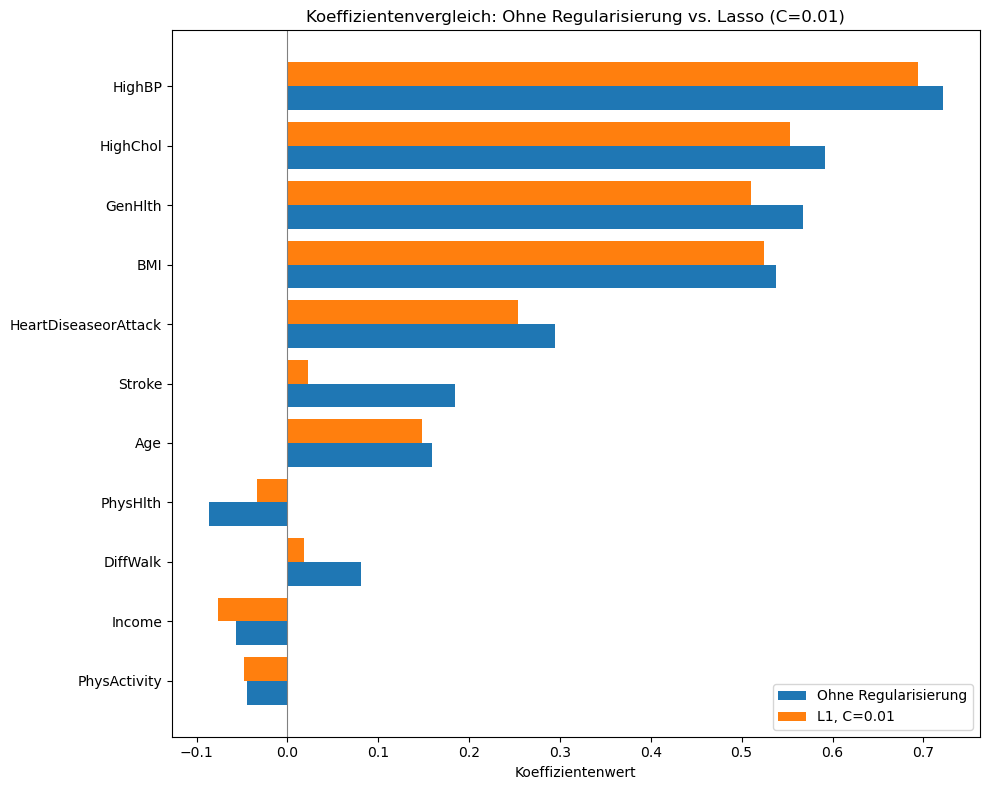

In [23]:
#DIESER ABSCHNITT DIENT LEDIGLICH DER VORBEREITUNG UND DEM PLOTTEN UND DEM ERSTELLEN VON TABELLEN 
# EINZIGER MEHRWERT HIER: TABELLEN UND PLOTS; ALLE WEITEREN INFORMATIONEN SIND UNTEN NOCHMAL ZU FINDEN


#********** Skalierung*********
#********************************




X_train_scaled = X_train.copy()
cols_scale = [2,7]
scaler = StandardScaler()
X_train_scaled[:, cols_scale] = scaler.fit_transform(X_train_scaled[:, cols_scale])
X_test_scaled = X_test.copy()
X_test_scaled[:, cols_scale] = scaler.transform(X_test_scaled[:, cols_scale])




# ***** Feature Selection / Lasso Regularisierung *****
#*****************************************************
logreg_featselect= LogisticRegression(solver='newton-cg', max_iter=1000, random_state=42, penalty=None).fit(X_train_scaled, y_train)
print("logreg_featselect: ", logreg_featselect.coef_)

logreg_featselectC1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=1.0).fit(X_train_scaled, y_train)
print("logreg_featselectC1: ", logreg_featselectC1.coef_)

logreg_featselectC01 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=0.1).fit(X_train_scaled, y_train)
print("logreg_featselectC01: ", logreg_featselectC01.coef_)

logreg_featselectC001 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=0.01).fit(X_train_scaled, y_train)
print("logreg_featselectC001: ", logreg_featselectC001.coef_)

coef_comparison = pd.DataFrame({
    'Feature': X_pd.columns,
    'Keine Regularisierung (newton-cg)': logreg_featselect.coef_[0],
    'L1, C=1.0': logreg_featselectC1.coef_[0],
    'L1, C=0.1': logreg_featselectC01.coef_[0],
    'L1, C=0.01': logreg_featselectC001.coef_[0],
})

print(coef_comparison)

coef_comparison = pd.DataFrame({
    'Feature': X_pd.columns,
    'KeineReg (newton-cg)': logreg_featselect.coef_[0],
    'L1, C=0.01': logreg_featselectC001.coef_[0],
})

# Prozentänderung berechnen (Division durch 0 vermeiden)
percent_change = (
    (coef_comparison['L1, C=0.01'] - coef_comparison['KeineReg (newton-cg)']) 
    / coef_comparison['KeineReg (newton-cg)'].replace(0, np.nan)
) * 100

# Neue Spalte an dritter Stelle einfügen
coef_comparison.insert(
    3,  # Position der Spalte
    'Prozentänderung (%)',
    percent_change
)
print(coef_comparison)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Beispielhafte Vorbereitung (ersetzen durch deine echten Modelle)
coefs_none = logreg_featselect.coef_[0]         # Modell ohne Regularisierung (newton-cg)
coefs_lasso = logreg_featselectC001.coef_[0]    # Modell mit L1, C=0.01
features = X_pd.columns

# DataFrame für Sortierung nach Wichtigkeit im unregulierten Modell
coef_df = pd.DataFrame({
    'Feature': features,
    'Ohne Regularisierung': coefs_none,
    'L1, C=0.01': coefs_lasso
})


# Sortieren nach Einfluss der unregulierten Regression (optional: abs-Wert)
coef_df = coef_df.sort_values(by='Ohne Regularisierung', key=abs)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.4
indices = np.arange(len(coef_df))

ax.barh(indices - bar_width/2, coef_df['Ohne Regularisierung'], bar_width, label='Ohne Regularisierung')
ax.barh(indices + bar_width/2, coef_df['L1, C=0.01'], bar_width, label='L1, C=0.01')

ax.set_yticks(indices)
ax.set_yticklabels(coef_df['Feature'])
ax.set_xlabel('Koeffizientenwert')
ax.set_title('Koeffizientenvergleich: Ohne Regularisierung vs. Lasso (C=0.01)')
ax.axvline(0, color='grey', linewidth=0.8)
ax.legend()

plt.tight_layout()
plt.show()

In [25]:
##### Funktion zur Beurteilung von estimators
# funktion erlaubt es schnell verschiedene scores für ein gefitetes Modell ausgeben zu lassen
def evaluate_classifier(model, X, y, label=""):
    y_pred = model.predict(X)
    accuracy = model.score(X, y)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)

    print(f"\n--- Ergebnisse für: {label} ---")
    print(f"Accuracy : {accuracy:}")
    print(f"Precision: {precision:}")
    print(f"Recall   : {recall:}")
    print(f"F1-Score : {f1:}")

    return accuracy, precision, recall, f1

# ***** Feature Selection / Lasso Regularisierung *****
#*****************************************************
# hier soll die auswirkung von der Lasso Regularisierung überprüft werden und die Robustheit der Koeffizienten überprüft werden
# es müssen unterschiedliche solver benutzt werden da lasso regilariserung dies erfordert
# um die feature relevanz zu überprüfen wird eine nicht regularisiertes Modell mit 3 lasso modellen (unterschiedliche reg-stärken für C) verglichen
logreg_featselect= LogisticRegression(solver='newton-cg', max_iter=1000, random_state=42, penalty=None).fit(X_train_scaled, y_train)
print("logreg_featselect: ", logreg_featselect.coef_)

logreg_featselectC1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=1.0).fit(X_train_scaled, y_train)
print("logreg_featselectC1: ", logreg_featselectC1.coef_)

logreg_featselectC01 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=0.1).fit(X_train_scaled, y_train)
print("logreg_featselectC01: ", logreg_featselectC01.coef_)

logreg_featselectC001 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty="l1", C=0.01).fit(X_train_scaled, y_train)
print("logreg_featselectC001: ", logreg_featselectC001.coef_)

coef_comparison = pd.DataFrame({
    'Feature': X_pd.columns,
    'Keine Regularisierung (newton-cg)': logreg_featselect.coef_[0],
    'L1, C=1.0': logreg_featselectC1.coef_[0],
    'L1, C=0.1': logreg_featselectC01.coef_[0],
    'L1, C=0.01': logreg_featselectC001.coef_[0],
})

print(coef_comparison)

#vergleich der prognosewerte
evaluate_classifier(logreg_featselect, X_train_scaled, y_train, label="Log Reg ohne Regu.")
evaluate_classifier(logreg_featselectC1, X_train_scaled, y_train, label="Log Reg mit Lasso")
evaluate_classifier(logreg_featselectC01, X_train_scaled, y_train, label="Log Reg mit Lasso")
evaluate_classifier(logreg_featselectC001, X_train_scaled, y_train, label="Log Reg mit Lasso")



# ***** Basis Regression ********
#********************************
#* auswahl eines basis models als baseline; auswahl der parameter auf Basis von Literatur
logreg = LogisticRegression(solver='newton-cg', max_iter=1000, random_state=42, penalty="l2", C=1.0).fit(X_train_scaled, y_train)

## beurteilung der vorhersagequalität anhand von trainingsdaten
# vorhersage von y (true/ false)
y_pred=logreg.predict(X_train_scaled)
# ausgabe der der wahrscheinlichkeiten für true/ false einer jeden beobachtung
logreg.predict_proba(X_train_scaled)


# * accuracy: anteil aller korrekter vorhersagen an gesamten vorhersagen
# * recall: anteil aller erkannten diabetes erkrankungen im verhältnis zu allen tatsächlichen erkrankungen
# * precision: anteil der tatsächlichen diabetes erkrankungen von den vorhergesagten diabetes erkrankungen


evaluate_classifier(logreg, X_train_scaled, y_train, label="Base Estimator- Trainingsdaten")

# Beurteilung anhand von testdaten
evaluate_classifier(logreg, X_train_scaled, y_train, label="Base Estimator- Testdaten")
y_pred_test=logreg.predict(X_test_scaled)





#cross_validation
# validierung ob die ergebnisse auf unterschiedlichen datensätzen stabil sind
#ergebnis: minimale abweichungen um 0.01 bis 0.02
cv_scores=cross_val_score(logreg,X_train_scaled,y_train,cv=5)
cv_scores.mean()
print("CV-Scores:", cv_scores)
print("CV-Scores Mean:",cv_scores.mean())

#***** Grid-search ******
#************************
# Fokus: optimierung von l2 regularisierten modellen (entscheidung auf basis theoretischer vorabüberlegungen)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga', "newton-cg"],
    'penalty': ['l2'],
    'max_iter': [500, 1000]
}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (accuracy):", grid_search.best_score_)


# Vergleich des bisherigen base line modells mit dem besten modell des grid searches
logreg_base_train = LogisticRegression(solver='newton-cg', max_iter=1000, random_state=42, penalty="l2", C=1.0).fit(X_train_scaled, y_train)
logreg_best_train = LogisticRegression(solver='liblinear', max_iter=500, random_state=42, penalty="l2", C=0.01).fit(X_train_scaled, y_train)
y_pred_base_train=logreg_base_train.predict(X_train_scaled)
y_pred_best_train=logreg_best_train.predict(X_train_scaled)



# vergleich auf basis von test und trainingsdaten
# ergebnis"bestes gridsearch modell" besser
evaluate_classifier(logreg_best_train, X_train_scaled, y_train, label="Beste Estimator- Trainingdaten")
evaluate_classifier(logreg_base_train, X_train_scaled, y_train, label="Base Estimator- Trainingdaten")
evaluate_classifier(logreg_best_train, X_test_scaled, y_test, label="Beste Estimator- Testdaten")
evaluate_classifier(logreg_base_train, X_test_scaled, y_test, label="Base Estimator- Testdaten")


# ******Optimierung: weitere GridSearches****
#*******************************************
# suche nach optimalen iterations
param_grid = {
    'C': [ 1],  # Controls regularization strength
    'solver': ['liblinear'],  # All support L2
    'penalty': ['l2'],  # Stick with L2 for stability
    'max_iter': [500, 1000, 2000,3000]
}

logreg = LogisticRegression(random_state=42)

#gridopt_iterations = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gridopt_iterations = GridSearchCV(logreg, param_grid, cv=5, scoring='recall', n_jobs=-1)
gridopt_iterations.fit(X_train_scaled, y_train)
print(gridopt_iterations.best_estimator_)

# überprüfung ob l1 doch bessere resultate liefert
# ergebnis zum teil schlechtere scores auf vierter nachkommastelle

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controls regularization strength
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1'],
    'max_iter': [500, 1000]
}

logreg = LogisticRegression(random_state=42)

gridopt_l1 = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gridopt_l1.fit(X_train_scaled, y_train)
print(gridopt_l1.best_estimator_)

logreg_bestl1 = LogisticRegression(solver='liblinear', max_iter=500, random_state=42, penalty="l1", C=0.01).fit(X_train_scaled, y_train)
evaluate_classifier(logreg_bestl1, X_test_scaled, y_test, label="Beste Estimator l1- Testdaten")


logreg_featselect:  [[ 0.72186086  0.59126245  0.53763772  0.18435396  0.29403928 -0.04433337
   0.56701428 -0.08673001  0.08103549  0.15966843 -0.0560634 ]]
logreg_featselectC1:  [[ 0.72217595  0.59064556  0.53738585  0.18040389  0.29459003 -0.04451271
   0.56580651 -0.08595101  0.0804439   0.15936052 -0.05650312]]
logreg_featselectC01:  [[ 0.71955686  0.58709828  0.53613202  0.16541063  0.29072052 -0.0447841
   0.56055135 -0.08105507  0.07466629  0.15830073 -0.05836135]]
logreg_featselectC001:  [[ 0.69458963  0.55318314  0.52473206  0.02247453  0.25339245 -0.04741498
   0.51019535 -0.03333434  0.01833903  0.14826093 -0.07646942]]
                 Feature  Keine Regularisierung (newton-cg)  L1, C=1.0  \
0                 HighBP                           0.721861   0.722176   
1               HighChol                           0.591262   0.590646   
2                    BMI                           0.537638   0.537386   
3                 Stroke                           0.184354   0.

(0.7481175789168839,
 0.7461139896373057,
 0.7719001269572577,
 0.7587880468695833)

## 2.2 Bayes

### Trainingsscores und Crossvalscores

erster Versuch mit Default-Werten der Modelle

In [27]:
# Modelle fitten, Score, Crossvalscore, Precision, Recall, f1
# schwankungen in CV scores? 

model = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'CategoricalNB': CategoricalNB()
}

results = {}

for name, model in model.items():
    print(type(model).__name__)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    print(f'Trainingsscore: {model.score(X_train,y_train)}')
    cv_recall=cross_val_score(model,X_train,y_train,cv=5,scoring='recall')
    print(f'CV Recall {cv_recall}')
    print(f'CV Recall Durchschnitt {cv_recall.mean()}')

    precision = precision_score(y_train, y_pred, average='binary') 
    recall = recall_score(y_train, y_pred, average='binary')
    f1 = f1_score(y_train, y_pred, average='binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    results[name] = {'Precision': precision,'Recall': recall,'F1-Score': f1}
    print()


GaussianNB
Trainingsscore: 0.6939451534075481
CV Recall [0.6063203  0.62810212 0.6115673  0.60799714 0.61085327]
CV Recall Durchschnitt 0.6129680265056967
Precision: 0.7388535031847133
Recall: 0.6129677235075692
F1-Score: 0.6700491764889548

BernoulliNB
Trainingsscore: 0.7022535976106435
CV Recall [0.71023032 0.71862167 0.71135309 0.7138522  0.70492681]
CV Recall Durchschnitt 0.7117968172792116
Precision: 0.7041288454067036
Recall: 0.7117966295344187
F1-Score: 0.7079419754620834

CategoricalNB
Trainingsscore: 0.7299665128065889
CV Recall [0.72915551 0.733619   0.73473759 0.72349161 0.72277758]
CV Recall Durchschnitt 0.7287562575688881
Precision: 0.7357199452567889
Recall: 0.7293630391316767
F1-Score: 0.7325277010793559



Jetzt soll versucht werden, die Scores durch entsprechende Datenvorbereitung in die Höhe zu treiben. 

In [30]:
### Wahl der Bayes-Modelle ###
# https://scikit-learn.org/stable/api/sklearn.naive_bayes.html

# BernoulliNB
# Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
# https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes

# CategorialNB:
# The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.
# https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes

### 2.2.1 GaussianNB

Can perform online updates to model parameters via partial_fit.
For details on algorithm used to update feature means and variance online, see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque.

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

#### Altersspalte transformieren und skalieren

In [34]:
# Dictionary fürs Encoding wie bei kaggle dokumentiert
age_encoding = [float(i) for i in range(1,14)]
age_ranges = [(18, 24),(25, 29),(30, 34),(35, 39),(40, 44),(45, 49),(50, 54),(55, 59),(60, 64),(65, 69),(70, 74),(75, 79),(80, 90)] # Obergrenze selbst festgelegt
age_means = [(low + high) / 2 for (low, high) in age_ranges]
age_dict = dict(zip(age_encoding, age_means))
print(age_dict)

{1.0: 21.0, 2.0: 27.0, 3.0: 32.0, 4.0: 37.0, 5.0: 42.0, 6.0: 47.0, 7.0: 52.0, 8.0: 57.0, 9.0: 62.0, 10.0: 67.0, 11.0: 72.0, 12.0: 77.0, 13.0: 85.0}


In [36]:
# Encoder, der die Altercodierung mit dem Mittelwert der Alterspanne ersetzt
class AgeMeanEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, col_index): # Spaltenindex von Age angeben
        self.col_index = col_index
        self.age_means = age_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        col = X_transformed[:, self.col_index]
        new_col = np.array([self.age_means.get(int(val), np.nan) for val in col])
        X_transformed[:, self.col_index] = new_col
        return X_transformed

In [38]:
X_train_pipe = X_train.copy()
columns = [2, 7, 9]

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns)
    ],
    remainder='passthrough'  # alle anderen Spalten unverändert lassen
)

pipe_gauss = Pipeline([
    ('agemeanencoder', AgeMeanEncoder(9)),  # eigene Transformation zuerst
    ('preprocessing', preprocessor)         # dann selektives Scaling
])

X_train_pipe = pipe_gauss.fit_transform(X_train_pipe)
print('Altersspalte transformiert und skaliert, plur Skalierung BMI und PhysHlth:')
for x in X_train_pipe[:3]:
    print(x)
# Achtung Reihenfolge geändert

Altersspalte transformiert und skaliert, plur Skalierung BMI und PhysHlth:
[-0.832953966604158 -0.5878888909970759 0.459076230099844 False True False
 False True 2.0 False 7.0]
[-0.5529287619242657 0.396782892868598 1.6807135735813832 True False False
 False True 2.0 True 7.0]
[-0.41291615958431954 -0.5878888909970759 -0.21961118294545562 True True
 False False True 3.0 False 3.0]


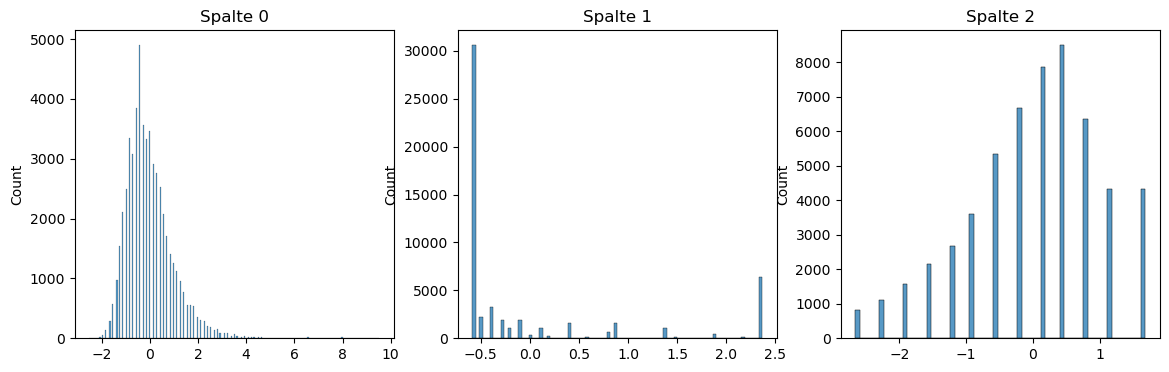

In [40]:
# plot: sind die Daten normalverteilt? was sagen mir die Diagramme?
# Spalte 2 rechtsschief, Spalte 9 linksschief

cols_scale = [0, 1, 2] # BMI, PhysHlth, Agetransformed 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4)) 

for i, col in enumerate(cols_scale):
    sns.histplot(X_train_pipe[:, col], ax=axes[i]) # ist hier der richtige datensatz drin?
    axes[i].set_title(f'Spalte {col}')

plt.show()

#### Skalieren ohne Transformation der Altersspalte

In [43]:
# zentriert die Daten (Mittelwert=0, Standardabweichung=1)
# Columns mit numerischen Werten / für ordinale und metrische gleich gut?

X_train_scale = X_train.copy()
cols_scale = [2, 7]
scaler = StandardScaler()

X_train_scale[:, cols_scale] = scaler.fit_transform(X_train_scale[:, cols_scale])

In [45]:
print('Nur Spalten BMI und PhysHlth skaliert:')
for x in X_train_scale[:3]:
    print(x)

Nur Spalten BMI und PhysHlth skaliert:
[False True -0.832953966604158 False False True 2.0 -0.5878888909970759
 False 10.0 7.0]
[True False -0.5529287619242657 False False True 2.0 0.396782892868598
 True 13.0 7.0]
[True True -0.41291615958431954 False False True 3.0 -0.5878888909970759
 False 8.0 3.0]


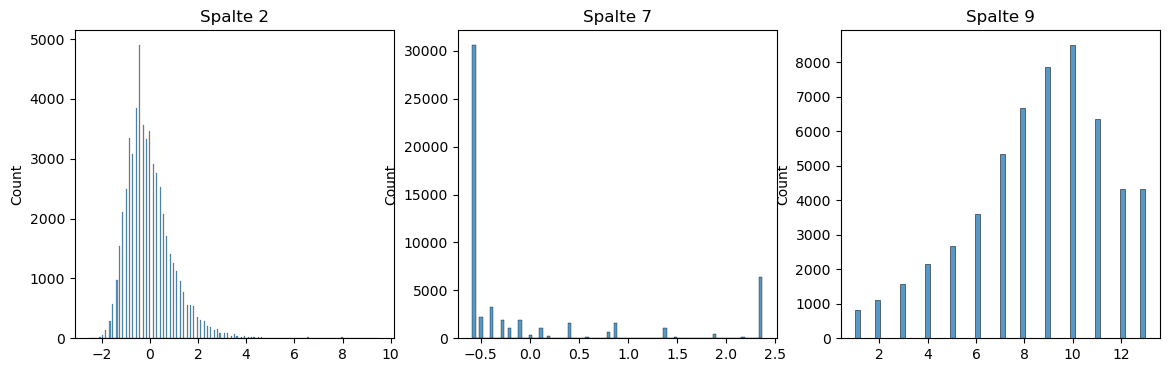

In [47]:
# plot: sind die Daten normalverteilt? was sagen mir die Diagramme?
# Spalte 2 rechtsschief, Spalte 9 linksschief

cols_scale = [2, 7, 9] # BMI, PhysHlth, Agetransformed 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4)) 

for i, col in enumerate(cols_scale):
    sns.histplot(X_train_scale[:, col], ax=axes[i]) # ist hier der richtige datensatz drin?
    axes[i].set_title(f'Spalte {col}')

plt.show()

Offenbar sind nur BMI und Alter einigermaßen normalverteilt. Ich erhoffe mir daher nicht viel für dieses Modell mit diesen Daten.

#### Datensatz zuschneiden

In [51]:
# binäre Spalten rausschmeißen und damit trainieren
# nehme als Grundlage den skalierten Datensatz, weil der etwas besser war als der tranfo
# hier auch pipe?
X_train_bool = X_train_scale.astype(bool)
is_binary = np.all((X_train_scale == 0) | (X_train_scale == 1), axis=0) # Finden der binären Spalten (True, wenn Spalte nur 0 oder 1 enthält)
X_train_nonbin = X_train_scale[:, ~is_binary] # Filtern der Spalten, die nicht binär sind (also alle außer binären)

print('Nur Spalten, die numerische Daten enthalten:')
for x in X_train_nonbin[:3]:
    print(x)

Nur Spalten, die numerische Daten enthalten:
[-0.832953966604158 2.0 -0.5878888909970759 10.0 7.0]
[-0.5529287619242657 2.0 0.396782892868598 13.0 7.0]
[-0.41291615958431954 3.0 -0.5878888909970759 8.0 3.0]


#### Trainingsscores und Crossvalscores

In [54]:
gauss = GaussianNB()
results_gauss = {}

X_data_gauss = {
    'X_train': X_train,
    'X_train skaliert': X_train_scale,
    'X_train trans und skaliert': X_train_pipe,
    'X_train nur numerische': X_train_nonbin,
    'X_train PCA': X_train_pca
}

for key, data in X_data_gauss.items(): # verschiedene Datensets (unskaliert, BMI und PhysHlth skaliert, Age transformiert und alle drei skaliert
    gauss.fit(data,y_train)
    print(f'Gauss mit {key}')
    print(f'Trainingsscore: {gauss.score(data,y_train)}')
    cv_scores=cross_val_score(gauss,data,y_train,cv=5,scoring='recall')
    print(f'CV Recall Durchschnitt {cv_scores.mean()}')
    print(f'CV Recall {cv_scores}')
    
    y_pred = gauss.predict(data)
    precision = precision_score(y_train, y_pred, average='binary')
    recall = recall_score(y_train, y_pred, average='binary')
    f1 = f1_score(y_train, y_pred, average='binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    results_gauss[key] = {'Precision': precision,'Recall': recall,'F1-Score': f1}
    print()

Gauss mit X_train
Trainingsscore: 0.6939451534075481
CV Recall Durchschnitt 0.6129680265056967
CV Recall [0.6063203  0.62810212 0.6115673  0.60799714 0.61085327]
Precision: 0.7388535031847133
Recall: 0.6129677235075692
F1-Score: 0.6700491764889548

Gauss mit X_train skaliert
Trainingsscore: 0.6939451534075481
CV Recall Durchschnitt 0.6129680265056967
CV Recall [0.6063203  0.62810212 0.6115673  0.60799714 0.61085327]
Precision: 0.7388535031847133
Recall: 0.6129677235075692
F1-Score: 0.6700491764889548

Gauss mit X_train trans und skaliert
Trainingsscore: 0.6934564213956014
CV Recall Durchschnitt 0.6121468338296555
CV Recall [0.60560614 0.62720943 0.61085327 0.60746162 0.60960371]
Precision: 0.738529145663694
Recall: 0.6120394173093402
F1-Score: 0.669360979324079

Gauss mit X_train nur numerische
Trainingsscore: 0.6941080640781971
CV Recall Durchschnitt 0.6271424155973576
CV Recall [0.62810212 0.63095876 0.63173866 0.61977865 0.62513388]
Precision: 0.7310812497399842
Recall: 0.6274278777

Trainingsscore, Crosscalscore und CV_Scores sind bei X_train und X_train_scale exakt gleich.
Bei X_train_trans, dessen Altersspalten enkodiert und danach alle drei Spalten skaliert wurden, sind die Scores um 100stel bis 100000stel schlechter als die anderen Scores. PCA performt am besten!

Sollte man an den Parametern rumschrauben?
priors: Klassenwahrscheinlichkeiten: wir wissen, dass die Zielspalte 50:50 verteilt ist, deshalb unnötig ?
var_smoothing: geschätzte Varianz, wenn die Varianz zu klein wird, kann das zu stinabilen oder unbrauchbaren Wahrscheinlichkeiten führen; man kann den Wert erhöhen, wenn numerische Probleme auftauchen oder das Modell overfittet -> beides nicht der Fall

### 2.2.2 BernoulliNB

#### Encoden

In [59]:
class ColBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, col_index, threshold):
        self.col_index = col_index
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_bin = X.copy()
        X_bin = X_bin.astype(float)
        X_bin[:, self.col_index] = (X_bin[:, self.col_index] >= self.threshold).astype(int)
        return X_bin

In [61]:
def apply_binarization(X, column, threshold):
    binarizer = ColBinarizer(column, threshold)
    binarizer.fit(X)
    return binarizer.transform(X)

In [63]:
X_train_agebin = apply_binarization(X_train,9,5) # Spalte Age in Altersrisiko für Diabetes: ja oder nein # ab 40 gefährdet # für Spalte 9 (age), 5 entspricht Altersspanne ab 40
X_train_bin = apply_binarization(X_train_agebin,2,25) # BMI-Spalte: ab BMI von 25 Übergewicht

X_test_agebin = apply_binarization(X_test,9,5)
X_test_bin = apply_binarization(X_test_agebin,2,25)

print(X_train_bin)
print(X_test_bin)

[[0. 1. 0. ... 0. 1. 7.]
 [1. 0. 1. ... 1. 1. 7.]
 [1. 1. 1. ... 0. 1. 3.]
 ...
 [1. 1. 1. ... 0. 1. 3.]
 [0. 0. 1. ... 1. 1. 3.]
 [0. 0. 0. ... 0. 0. 8.]]
[[1. 1. 1. ... 0. 1. 8.]
 [1. 1. 1. ... 0. 0. 8.]
 [1. 1. 1. ... 1. 1. 6.]
 ...
 [1. 1. 1. ... 1. 1. 7.]
 [0. 0. 1. ... 0. 0. 3.]
 [0. 0. 1. ... 0. 1. 8.]]


#### Datensatz zuschneiden

In [66]:
# nicht-binäre Spalten rausschmeißen und damit trainieren
X_train_bool = X_train_bin.astype(bool)
X_train_bool = X_train_bin[:, np.all(X_train_bool == X_train, axis=0)]
print(X_train_bool.shape)

(55245, 6)


#### Trainingsscores und Crossvalscores

In [69]:
# Scores vergleichen von X_train unbehandelt und X_train_bin mit binär kodiertem Alter und BMI

bern = BernoulliNB()
results_bern = {}

X_data_bern = {
    'X_train': X_train,
    'X_train Alter und BMI binär': X_train_bin,
    'X_train nur bools': X_train_bool,
    'X_train PCA': X_train_pca
}

for key, data in X_data_bern.items(): # verschiedene Datensets (unskaliert, BMI und PhysHlth skaliert, Age transformiert und alle drei skaliert
    bern.fit(data,y_train)
    print(f'BernoulliNB mit {key}')
    print(f'Trainingsscore: {bern.score(data,y_train)}')
    cv_scores=cross_val_score(bern,data,y_train,cv=5,scoring='recall')
    print(f'CV Recall Durchschnitt {cv_scores.mean()}')
    print(f'CV Recall {cv_scores}')

    y_pred = bern.predict(data)
    precision = precision_score(y_train, y_pred, average='binary')
    recall = recall_score(y_train, y_pred, average='binary')
    f1 = f1_score(y_train, y_pred, average='binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    results_bern[key] = {'Precision': precision,'Recall': recall,'F1-Score': f1}
    print()

BernoulliNB mit X_train
Trainingsscore: 0.7022535976106435
CV Recall Durchschnitt 0.7117968172792116
CV Recall [0.71023032 0.71862167 0.71135309 0.7138522  0.70492681]
Precision: 0.7041288454067036
Recall: 0.7117966295344187
F1-Score: 0.7079419754620834

BernoulliNB mit X_train Alter und BMI binär
Trainingsscore: 0.7117929224364196
CV Recall Durchschnitt 0.7395746577359924
CV Recall [0.73683271 0.74933048 0.7418779  0.73866476 0.73116744]
Precision: 0.7059785943145409
Recall: 0.739502999143102
F1-Score: 0.7223520385031214

BernoulliNB mit X_train nur bools
Trainingsscore: 0.7025794189519413
CV Recall Durchschnitt 0.7054421734885536
CV Recall [0.72969113 0.70558829 0.69921457 0.70028561 0.69243127]
Precision: 0.7096598935129849
Recall: 0.6995501285347043
F1-Score: 0.7045687469658558

BernoulliNB mit X_train PCA
Trainingsscore: 0.6954475518146439
CV Recall Durchschnitt 0.7537847929817703
CV Recall [0.7557579  0.75629352 0.75722956 0.74687612 0.75276687]
Precision: 0.6801327276827421
Reca

Die Scores des Datensatzes mit den beiden neuen binärkodierten Spalten ist um ca. 0,01 höher als der Score vom normalen X_train. Eine Matrix, die nur boolsche Werte beinhaltet, also nur noch 6 Spalten hat, performt minimal schlechter als der binärkodierte Datensatz mit allen Spalten und noch minimaler besser als der unbehandelte Datensatz X_train.

### 2.2.3 CategoricalNB

#### OrdinalEncoder

In [73]:
X_train_enc = X_train.copy()
encoder = OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train_enc) # liefert exakt das gleiche
print(X_train_enc)

[[ 0.  1. 12. ...  0.  9.  6.]
 [ 1.  0. 14. ...  1. 12.  6.]
 [ 1.  1. 15. ...  0.  7.  2.]
 ...
 [ 1.  1. 14. ...  0. 11.  2.]
 [ 0.  0. 17. ...  1.  6.  2.]
 [ 0.  0. 12. ...  0.  3.  7.]]


#### BMI-Spalte binarisieren

In [76]:
X_train_bin_bmi = X_train.copy()
X_test_bin_bmi = X_test.copy()

X_train_bin_bmi = apply_binarization(X_train_bin_bmi,2,25) # BMI-Spalte: ab BMI von 25 Übergewicht
X_test_bin_bmi = apply_binarization(X_test_bin_bmi,2,25)

[[ 0.  1.  0. ...  0. 10.  7.]
 [ 1.  0.  1. ...  1. 13.  7.]
 [ 1.  1.  1. ...  0.  8.  3.]
 ...
 [ 1.  1.  1. ...  0. 12.  3.]
 [ 0.  0.  1. ...  1.  7.  3.]
 [ 0.  0.  0. ...  0.  4.  8.]]
[[ 1.  1.  1. ...  0. 10.  8.]
 [ 1.  1.  1. ...  0.  4.  8.]
 [ 1.  1.  1. ...  1. 13.  6.]
 ...
 [ 1.  1.  1. ...  1. 11.  7.]
 [ 0.  0.  1. ...  0.  1.  3.]
 [ 0.  0.  1. ...  0.  5.  8.]]


#### Trainingsscores und Crossvaluescores

In [79]:
cat = CategoricalNB()
results_cat = {}

X_data_cat = {
    'X_train': X_train,
    'X_train encoded': X_train_enc,
    'X_train bin_bmi': X_train_bin_bmi,
}

for key, data in X_data_cat.items(): # verschiedene Datensets (unskaliert, BMI und PhysHlth skaliert, Age transformiert und alle drei skaliert
    cat.fit(data,y_train)
    print(f'CategoricalNB mit {key}')
    print(f'Trainingsscore: {cat.score(data,y_train)}')
    cv_scores=cross_val_score(cat,data,y_train,cv=5,scoring='recall')
    print(f'CV Recall Durchschnitt {cv_scores.mean()}')
    print(f'CV Recall {cv_scores}')

    y_pred = cat.predict(data)
    precision = precision_score(y_train, y_pred, average='binary')
    recall = recall_score(y_train, y_pred, average='binary')
    f1 = f1_score(y_train, y_pred, average='binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    results_cat[key] = {'Precision': precision,'Recall': recall,'F1-Score': f1}
    print()


CategoricalNB mit X_train
Trainingsscore: 0.7299665128065889
CV Recall Durchschnitt 0.7287562575688881
CV Recall [0.72915551 0.733619   0.73473759 0.72349161 0.72277758]
Precision: 0.7357199452567889
Recall: 0.7293630391316767
F1-Score: 0.7325277010793559

CategoricalNB mit X_train encoded
Trainingsscore: 0.7299665128065889
CV Recall Durchschnitt 0.7287562575688881
CV Recall [0.72915551 0.733619   0.73473759 0.72349161 0.72277758]
Precision: 0.7357199452567889
Recall: 0.7293630391316767
F1-Score: 0.7325277010793559

CategoricalNB mit X_train bin_bmi
Trainingsscore: 0.7244275500045253
CV Recall Durchschnitt 0.724471856628346
CV Recall [0.72469202 0.73201214 0.72777579 0.72170653 0.7161728 ]
Precision: 0.7301764494058336
Recall: 0.7239717223650386
F1-Score: 0.7270608483631539



Hier ist der Datensatz mit den binär kodierten Spalten etwas schlechter als die normalen Trainingsdaten, weil so Informationen reduziert werden. CategorialNB kann gut mit Ordinaldaten umgehen, die nicht nur 0 und 1 sind und ist daher von den drei Modellen am besten geeignet und kann direkt mit X_train trainiert werden. Eine Skalierung ist hier auch unnötig, da ganzzahlige ordinale Werte gebraucht werden.
PCA-Datensatz läuft nicht, weil die negative Werte enthält und die Klasse auf ordinale Daten, die positiv sind, ausgerichtet ist.

### 2.2.5 GridSearch

In [81]:
# alpha
# class_prios = [0.7,0.3] zb. für Verteilung von Strokes bei älteren Personen -> recherchieren
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0],
    'class_prior': [[0.8, 0.2], [0.7, 0.3], [0.9,0.1], None] # real-Verteilung ist 9% Diabetes 
}

In [83]:
# GridSearch BernoulliNB - # gridsearch mit unterschiedlichen X!!!!!

grid_search = GridSearchCV(BernoulliNB(), param_grid, scoring='recall', cv=5, n_jobs=-1) 
grid_search.fit(X_train_pca, y_train)

print("Beste Parameter:", grid_search.best_params_)
print("Bester Recall-Score:", grid_search.best_score_)

# best_estimator_ abspeichern
# scores abspeichern
# recall abspeichern

Beste Parameter: {'alpha': 0.01, 'class_prior': None}
Bester Recall-Score: 0.7537847929817703


In [84]:
# GridSearch CategoricalNB
grid_search = GridSearchCV(CategoricalNB(), param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Beste Parameter:", grid_search.best_params_)
print("Bester Recall-Score:", grid_search.best_score_)

Beste Parameter: {'alpha': 0.01, 'class_prior': None}
Bester Recall-Score: 0.7288990700836879


### 2.2.6 Auswertung auf Testdaten

In [88]:
gauss = GaussianNB()
gauss.fit(X_train_pca,y_train)

y_pred_gauss = gauss.predict(X_test_pca) # X_test muss wie X_train preprocessed werden
precision = precision_score(y_test, y_pred_gauss)
recall = recall_score(y_test, y_pred_gauss)
f1 = f1_score(y_test, y_pred_gauss)
score = gauss.score(X_test_pca,y_test)

print('Testscores GaussianNB')
print()
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Accuracy: {score}')
print()
cv_scores=cross_val_score(gauss,X_test_pca,y_test,cv=5,scoring='recall')
print(f'CV recall Durchschnitt {cv_scores.mean()}')

Testscores GaussianNB

Precision: 0.7489953632148377
Recall: 0.6835943010297644
F1-Score: 0.714801976546943
Accuracy: 0.7200260642919201

CV recall Durchschnitt 0.6954415106509412


In [90]:
bern = BernoulliNB(alpha= 0.01, class_prior= None)
bern.fit(X_train_pca,y_train)

y_pred_bern = bern.predict(X_test_pca) # X_test muss wie X_train preprocessed werden
precision = precision_score(y_test, y_pred_bern)
recall = recall_score(y_test, y_pred_bern)
f1 = f1_score(y_test, y_pred_bern)
score = bern.score(X_test_pca,y_test)

print('Testscores BernoulliNB mit X_test_pca')
print()
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Accuracy: {score}')
print()
cv_scores=cross_val_score(bern,X_test_pca,y_test,cv=5,scoring='recall')
print(f'CV Recall Durchschnitt {cv_scores.mean()}')

Testscores BernoulliNB mit X_test_pca

Precision: 0.6972537628729866
Recall: 0.7449569755959938
F1-Score: 0.7203164427470504
Accuracy: 0.7030842745438749

CV Recall Durchschnitt 0.799831882251882


In [92]:
bern = BernoulliNB()
bern.fit(X_train_bin,y_train)

y_pred_bern = bern.predict(X_test_bin) # X_test muss wie X_train preprocessed werden
precision = precision_score(y_test, y_pred_bern)
recall = recall_score(y_test, y_pred_bern)
f1 = f1_score(y_test, y_pred_bern)
score = bern.score(X_test_bin,y_test)

print('Testscores BernoulliNB mit X_test_bin')
print()
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Accuracy: {score}')
print()
cv_scores=cross_val_score(bern,X_test_bin,y_test,cv=5,scoring='recall')
print(f'CV Recall Durchschnitt {cv_scores.mean()}')

Testscores BernoulliNB mit X_test_bin

Precision: 0.7233365610734541
Recall: 0.7376216673719848
F1-Score: 0.7304092750384132
Accuracy: 0.7205328699681437

CV Recall Durchschnitt 0.7347987812707472


In [94]:
cat = CategoricalNB()
cat.fit(X_train,y_train)

y_pred_cat = cat.predict(X_test)
precision = precision_score(y_test, y_pred_cat)
recall = recall_score(y_test, y_pred_cat)
f1 = f1_score(y_test, y_pred_cat)
score = cat.score(X_test,y_test)

print('Testscores CategoricalNB')
print()
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Accuracy: {score}')
print()
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(cat, X_train, y_train, cv=cv,scoring='recall')
# cv_scores=cross_val_score(cat,X_test,y_test,cv=5)
print(f'Crossvalscore Durchschnitt {cv_scores.mean()}')

Testscores CategoricalNB

Precision: 0.7529154518950437
Recall: 0.7285935957116659
F1-Score: 0.740554878485913
Accuracy: 0.7379814653924124

Crossvalscore Durchschnitt 0.7287562575688881


## 2.3 Random Forest
### 2.3.1 Erster Durchlauf mit Default Einstellungen
Es soll zunächst eine robuste Basis gelegt werden.
Zur Bewertung der Güter werden accuracy, recall, precision und F1 Score herangezogen.
Ziel Score ist laut Auftraggeber recall

In [16]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)

y_pred_test = rf.predict(X_test)

# Bewertung auf Trainingsdaten
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Bewertung auf Testdaten
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("=== Bewertung auf Trainingsdaten ===")
print(f"Train Recall: {recall_train:.4f}")
print(f"Train Precision: {precision_train:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train F1 Score: {f1_train:.4f}")

print("\n=== Bewertung auf Testdaten ===")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

=== Bewertung auf Trainingsdaten ===
Train Recall: 0.9358
Train Precision: 0.9486
Train Accuracy: 0.9418
Train F1 Score: 0.9422

=== Bewertung auf Testdaten ===
Test Recall: 0.7416
Test Precision: 0.7136
Test Accuracy: 0.7146
Test F1 Score: 0.7273


Bewertung: Mit einem recall Score von 0.7409 auf den Testdateen sind wir nicht zufrieden. Der Vergleich zu den TestDaten zeigt Overfitting des Models.

### 2.3.2. Gridsearch_1

In [18]:
# Parameter Def
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,            
    n_jobs=-1,       
    verbose=2,
    scoring='recall' # Soring Recall laut Auftraggeber!!!!!
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)

print("\n=== Beste Parameterkombination (GridSearchCV) ===")
print(grid_search.best_params_)

print(f"\nBester Cross-Validation-Recall: {grid_search.best_score_:.4f}")

print("\n=== Bewertung auf Trainingsdaten ===")
print(f"Train Recall: {recall_train:.4f}")
print(f"Train Precision: {precision_train:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train F1 Score: {f1_train:.4f}")

print("\n=== Bewertung auf Testdaten ===")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

=== Beste Parameterkombination (GridSearchCV) ===
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Bester Cross-Validation-Recall: 0.7932

=== Bewertung auf Trainingsdaten ===
Train Recall: 0.9358
Train Precision: 0.9486
Train Accuracy: 0.9418
Train F1 Score: 0.9422

=== Bewertung auf Testdaten ===
Test Recall: 0.7416
Test Precision: 0.7136
Test Accuracy: 0.7146
Test F1 Score: 0.7273


### 2.3.2. Gridsearch_2

In [19]:
# Parameter Def
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='recall', # Soring Recall laut Auftraggeber!!!!!
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_train = best_rf.predict(X_train)

y_pred_test = best_rf.predict(X_test)

recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)


print("\n=== Beste Parameterkombination (GridSearchCV) ===")
print(grid_search.best_params_)

print(f"\nBester Cross-Validation-Recall: {grid_search.best_score_:.4f}")

print("\n=== Bewertung auf Trainingsdaten ===")
print(f"Train Recall: {recall_train:.4f}")
print(f"Train Precision: {precision_train:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train F1 Score: {f1_train:.4f}")

print("\n=== Bewertung auf Testdaten ===")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

=== Beste Parameterkombination (GridSearchCV) ===
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Bester Cross-Validation-Recall: 0.7932

=== Bewertung auf Trainingsdaten ===
Train Recall: 0.8108
Train Precision: 0.7410
Train Accuracy: 0.7604
Train F1 Score: 0.7743

=== Bewertung auf Testdaten ===
Test Recall: 0.7976
Test Precision: 0.7400
Test Accuracy: 0.7522
Test F1 Score: 0.7677


### 2.3.2. Gridsearch_3

In [20]:
# Param Def
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [8, 9, 10, 11, 12],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,             
    n_jobs=-1,        
    verbose=2,
    scoring='recall'  # Wie immer
)

grid_search.fit(X_train, y_train)

print("Beste Parameterkombination:", grid_search.best_params_)
print(f"Bester Recall auf Trainingssets (Cross-Validation): {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)

print("\n=== Bewertung auf Testdaten ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
483 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\alfa\anaconda3\Lib\site-packages\

Beste Parameterkombination: {'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Bester Recall auf Trainingssets (Cross-Validation): 0.7941

=== Bewertung auf Testdaten ===
Test Accuracy: 0.7531
Test Recall: 0.8004
Test Precision: 0.7399


### 2.3.2. Gridsearch_4

In [21]:
param_dist = {
    'n_estimators': randint(100, 300),        
    'max_depth': [8, 9, 10, 11, 12, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,        # Nur 50 Zufallszüge! (statt ALLE Kombinationen)
    scoring='recall', 
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train, y_train)

print("Beste Parameterkombination:", random_search.best_params_)
print(f"Bester Recall auf Trainingssets (Cross-Validation): {random_search.best_score_:.4f}")

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)

print("\n=== Bewertung auf Testdaten ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\alfa\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\alfa\anaconda3\Lib\site-packages\skl

Beste Parameterkombination: {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 231}
Bester Recall auf Trainingssets (Cross-Validation): 0.7933

=== Bewertung auf Testdaten ===
Test Accuracy: 0.7526
Test Recall: 0.7987
Test Precision: 0.7399


### Best Model, Feature Importance and Confusion Matrix

In [22]:
final_rf = RandomForestClassifier(
bootstrap=True,
max_depth=9,
max_features='sqrt',
min_samples_leaf=1,
min_samples_split=5,
n_estimators=250,
random_state=42
)


final_rf.fit(X_train, y_train)

y_pred_train = final_rf.predict(X_train)

y_pred_test = final_rf.predict(X_test)

# Bewertung auf Trainingsdaten
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Bewertung auf Testdaten
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("=== Bewertung auf Trainingsdaten ===")
print(f"Train Recall: {recall_train:.4f}")
print(f"Train Precision: {precision_train:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train F1 Score: {f1_train:.4f}")

print("\n=== Bewertung auf Testdaten ===")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

=== Bewertung auf Trainingsdaten ===
Train Recall: 0.8079
Train Precision: 0.7366
Train Accuracy: 0.7561
Train F1 Score: 0.7706

=== Bewertung auf Testdaten ===
Test Recall: 0.8004
Test Precision: 0.7399
Test Accuracy: 0.7531
Test F1 Score: 0.7689


### Feature Importance

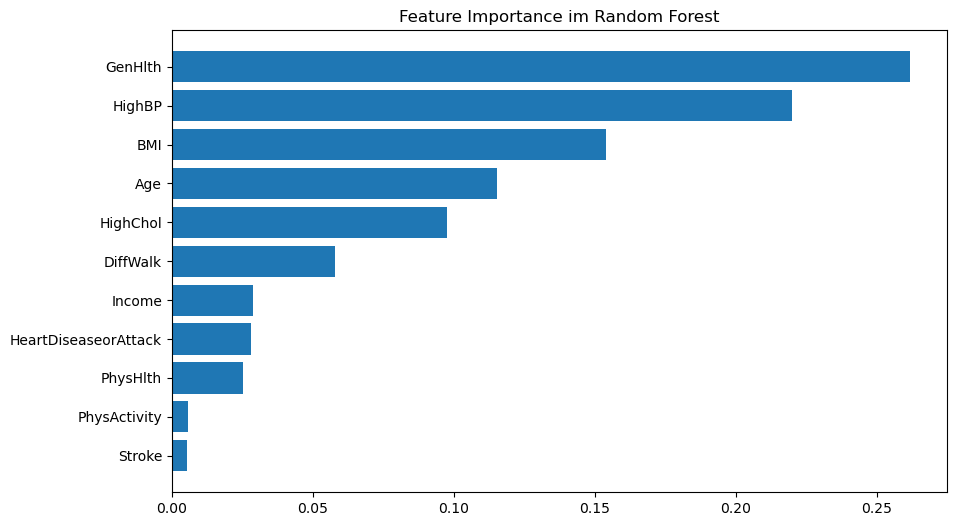

                 Feature  Importance
6                GenHlth    0.261837
0                 HighBP    0.219992
2                    BMI    0.153970
9                    Age    0.115373
1               HighChol    0.097663
8               DiffWalk    0.057916
10                Income    0.028750
4   HeartDiseaseorAttack    0.028189
7               PhysHlth    0.025112
5           PhysActivity    0.005658
3                 Stroke    0.005539


In [23]:
feature_importances = final_rf.feature_importances_
features = X_pd.columns  

# Grafik
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance im Random Forest')
plt.show()

print(feat_importance_df)

### Confusion Matrix

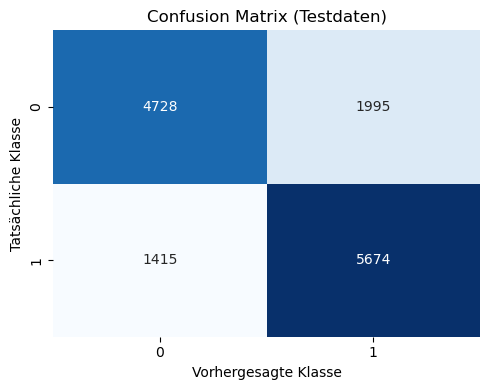

In [25]:
# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred_test)

# Visualisierung
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Testdaten)')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.tight_layout()
plt.show()

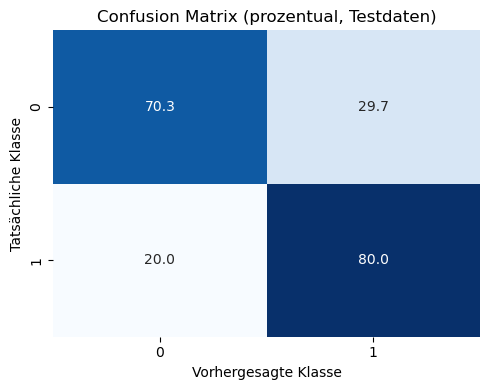

In [26]:
# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred_test)

# Prozentuale Normalisierung (zeilenweise, also pro tatsächliche Klasse)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Visualisierung
plt.figure(figsize=(5, 4))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (prozentual, Testdaten)')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.tight_layout()
plt.show()

## 2.4 Support Vector Machine

### 2.4.1 Trainingslauf mit Defaultwerten des SVC Modells

In [25]:
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Hilfsfunktion zum Scoren und zur Ausgabe der Scores
def score_and_print(model, X, y, test=False, gammaVal=None):
    if test:
        s_data = "Testdaten"
    else:
        s_data = "Trainingsdaten"
        print(f"{model.support_vectors_.size} : Datensätze auf der Straße")
        unique_support_vectors = np.unique(model.support_)
        print(f"Anzahl der eindeutigen Support-Vektoren: {len(unique_support_vectors)}")
        print(f"{model.support_} #: Indizes der Supportvektoren")
        print(f"{model.n_support_} #: Anzahl der Supportvektoren pro Klasse")

    # Berechne  precision + recall
    y_pred = model.predict(X)
    rec = recall_score(y, y_pred)
    prec = precision_score(y, y_pred)
    acc = accuracy_score(y, y_pred)
    print(f"{rec:.4f} #: Recall auf {s_data}")
    print(f"{prec:.4f} #: Precision auf {s_data}")
    print(f"Accuracy  auf {s_data}: {acc:.4f}")

In [6]:
# Datenvorbereitnug:
#im Unterschied zu anderen Algorithmen benötigen SVMs numerische Merkmale, also konvertiere die Boolschen Werte zurück zu float.
for col in X_pd.select_dtypes(include=['bool']).columns:
    X_pd[col] = X_pd[col].astype(float) # ggf. unnötig, da vom Modell intern sowieso als "0" und "1" interpretiert (aber dann nur als "int")??

y_pd = y_pd.astype(float)

# Skaliere die Merkmale, jedoch belasse die Spalten mit binären Kategorien unskaliert.
#    Identifizeiere die zu skalierenden Spalten
columns_to_find = ['BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income']
#         Bestimme die Indizes dieser Spalten
column_indices = [X_pd.columns.get_loc(col) for col in columns_to_find if col in X_pd.columns]
print(column_indices)

# Daten in numpy umwandeln
X = X_pd.to_numpy()
y = y_pd.to_numpy()

# Daten in Trainings- und testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[2, 6, 7, 9, 10]


In [32]:
# Führe Training und Test aus
clf = pipeline.named_steps['classifier']
score_and_print(clf, X=X_train_scaled, y=y_train)
score_and_print(clf, X=X_test, y=y_test, test=True)

347512 : Datensätze auf der Straße
Anzahl der eindeutigen Support-Vektoren: 31592
[    2     4     5 ... 56547 56548 56550] #: Indizes der Supportvektoren
[15641 15951] #: Anzahl der Supportvektoren pro Klasse
0.7992 #: Recall auf Trainingsdaten
0.7189 #: Precision auf Trainingsdaten
Accuracy  auf Trainingsdaten: 0.7432
0.7971 #: Recall auf Testdaten
0.7117 #: Precision auf Testdaten
Accuracy  auf Testdaten: 0.7379


#### 2.4.1.2 Defaultwerte unskaliert

In [8]:
clf = SVC()
clf.fit(X_train, y_train)
score_and_print(clf, X=X_train, y=y_train)
score_and_print(clf, X=X_test, y=y_test, test=True)

364023 : Datensätze auf der Straße
Anzahl der eindeutigen Support-Vektoren: 33093
[    0     1     2 ... 55238 55239 55240] #: Indizes der Supportvektoren
[16538 16555] #: Anzahl der Supportvektoren pro Klasse
0.8030 #: Recall auf Trainingsdaten
0.7188 #: Precision auf Trainingsdaten
Accuracy  auf Trainingsdaten: 0.7409
0.8072 #: Recall auf Testdaten
0.7338 #: Precision auf Testdaten
Accuracy  auf Testdaten: 0.7507


### 2.4.2 GridSearch

Parameter:
Aufgrund langer Laufzeiten mussten einige Einschränkungen in Kauf genommen werden (weniger C-Werte für poly und einen kleineren "degree" Wert beim Polynomial-Kernel.

In [ ]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 0.2, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 0.2, 1, 10],
        'gamma': [0.01, 0.1, 0.2, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 0.2, 1],    # weniger C- Werte für poly (poly ist langsamer)
        'gamma': [0.01, 0.1, 0.2],
        'degree': [2]          # kleiner als default = 3 um Performanz zu erhähen
    }
]


In [9]:
# Initialisiere weitere Parameter und die erzeuge die SVM
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy'
}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter zum Beschleunigen der Berechnungen
cache_size = 5000
#shrink = False
#tol = 0.01
#max_iter = 10000  #convergence warning mit max_iter = 5000 und accuracy noch schlechter, ebenso warning mit 7500, aber accuracy immerhin 0.51 für das erste Modell

# Bestrafe, wenn "Recall" überbewertet wird
svc = SVC(class_weight='balanced',  cache_size=cache_size) #, shrinking=shrink, tol=tol,max_iter=max_iter

In [10]:
# Instantiiere GridSearch.
grid_search = GridSearchCV(
    svc,
    param_grid,
    scoring=scoring,
    refit='recall',
    cv=cv_strategy,
    verbose=2, # scores ausgeben
    n_jobs=-1  # alle CPU Kerne benutzen
)

# Finde das beste Modell
grid_search.fit(X_train_scaled, y_train)

# Speichere das GridSearch objekt
with open('svm_gridsearch_full.pkl', 'wb') as fgrid:
    pickle.dump(grid_search, fgrid)

# Speichere die Ergebnisse in einem Pandas Dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Zeige die wichtigsten Spalten
print(results[[
    'params',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall',
    'mean_test_precision', 'mean_test_accuracy'
]])
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# serialisiere die Ergebnisse separat
with open('svm_gridSearch_results_balancedCV_balancedClass.pkl', 'wb') as fout:
    pickle.dump(results, fout)

from datetime import datetime

# Generate timestamped filename
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
filename = f'svm_best_estimator_{timestamp}.pkl'

# Serialisiere das beste Modell
with open(filename, 'wb') as f3:
    pickle.dump(grid_search.best_estimator_, f3)

print(f"Bestes Modell gespeichert als: '{filename}'")

Fitting 5 folds for each of 29 candidates, totalling 145 fits


KeyboardInterrupt: 

In [11]:
# Einlesen der Grid Search Ergebnisse für SVM (SVC)
with open('svm_gridSearch_results_balancedCV_balancedClass.pkl', 'rb') as f:
    svm_grid_res2 = pickle.load(f)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Ensure wide columns are fully visible
    
svm_grid_res2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,param_degree,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,263.442659,3.670165,20.454283,1.428124,0.1,linear,NaN,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.782717,0.773255,0.780793,0.777401,0.781507,0.779134,0.003429,17,0.724389,0.729125,0.725734,0.723302,0.716648,0.723839,0.004095,8,0.738890,0.739433,0.739252,0.736356,0.732555,0.737297,0.002619,6
1,260.806614,5.034665,18.463699,1.358044,0.2,linear,NaN,NaN,"{'C': 0.2, 'kernel': 'linear'}",0.781825,0.775040,0.779186,0.776151,0.782221,0.778885,0.002902,18,0.725601,0.729948,0.725927,0.723943,0.717185,0.724521,0.004165,5,0.739524,0.740610,0.738890,0.736447,0.733189,0.737732,0.002651,4
2,271.762243,12.698990,17.228719,1.211040,1.0,linear,NaN,NaN,"{'C': 1, 'kernel': 'linear'}",0.781289,0.775397,0.778472,0.775437,0.781507,0.778420,0.002676,20,0.725825,0.729548,0.725866,0.724846,0.716648,0.724546,0.004263,4,0.739524,0.740429,0.738619,0.736899,0.732555,0.737605,0.002782,5
3,286.539623,4.442821,19.601699,1.110137,10.0,linear,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",0.780396,0.775576,0.778829,0.775973,0.781864,0.778528,0.002448,19,0.726080,0.729471,0.726198,0.724983,0.716975,0.724741,0.004163,3,0.739433,0.740429,0.738981,0.737171,0.732917,0.737786,0.002654,3
4,345.433271,4.248371,64.441071,2.998111,0.1,rbf,0.01,NaN,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.767899,0.770398,0.774902,0.775080,0.764013,0.770458,0.004224,22,0.677110,0.682537,0.680194,0.679606,0.672533,0.678396,0.003402,29,0.696715,0.701964,0.701149,0.700697,0.691737,0.698452,0.003815,27
5,339.014209,4.256345,55.793856,3.340802,0.1,rbf,0.10,NaN,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.798607,0.794144,0.803285,0.803642,0.803285,0.800592,0.003723,3,0.709775,0.708845,0.711687,0.711554,0.703125,0.708997,0.003127,27,0.732374,0.730292,0.735270,0.735270,0.728301,0.732302,0.002745,19
6,321.675274,12.270062,57.998195,3.746015,0.1,rbf,0.20,NaN,"{'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}",0.792537,0.788252,0.795787,0.795787,0.798822,0.794237,0.003593,5,0.711949,0.709921,0.713394,0.713623,0.705947,0.710967,0.002835,25,0.732283,0.729387,0.734365,0.734546,0.729297,0.731976,0.002293,20
7,321.014448,5.645894,51.700244,4.483580,0.1,rbf,1.00,NaN,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.786288,0.785395,0.786505,0.791682,0.797572,0.789488,0.004606,8,0.710323,0.711352,0.712830,0.710623,0.706738,0.710373,0.002013,26,0.729116,0.729659,0.731107,0.730926,0.729568,0.730075,0.000792,22
8,330.627624,4.562441,55.688569,1.375197,0.2,rbf,0.01,NaN,"{'C': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}",0.779147,0.781289,0.780079,0.789361,0.779543,0.781884,0.003808,16,0.692259,0.699712,0.701332,0.697146,0.689454,0.695981,0.004480,28,0.712463,0.719160,0.720065,0.719341,0.710200,0.716246,0.004087,25
9,323.309210,7.972867,52.831212,5.294352,0.2,rbf,0.10,NaN,"{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}",0.800036,0.793073,0.803820,0.803285,0.807747,0.801592,0.004914,2,0.714445,0.711631,0.714082,0.714286,0.706369,0.712163,0.003074,24,0.736537,0.732193,0.737352,0.737352,0.732283,0.735143,0.002391,12


In [19]:
# Filtere die besten 3 Modelle laut Recall Scores und zeige nur relevante Spalten
results_sorted = svm_grid_res2.sort_values(by='rank_test_recall')
best_overall = results_sorted.head(3)
best_overall = best_overall[['params', 'mean_test_recall', 'std_test_recall', 'rank_test_recall','mean_test_precision', 'std_test_precision', 'rank_test_precision', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy']].sort_values(by='rank_test_recall', ascending=True)
best_overall

,params,mean_test_recall,std_test_recall,rank_test_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
13,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.801806,0.004278,1,0.714633,0.002551,20,0.737189,0.002295,7
9,"{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}",0.801592,0.004914,2,0.712163,0.003074,24,0.735143,0.002391,12
5,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.800592,0.003723,3,0.708997,0.003127,27,0.732302,0.002745,19


In [18]:
# Filtere die besten linearen Modelle 
best_linear = results_sorted[results_sorted['param_kernel'] == 'linear'].head(3)
best_linear = best_linear[['params', 'mean_test_recall', 'std_test_recall', 'rank_test_recall','mean_test_precision', 'std_test_precision', 'rank_test_precision', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy']].sort_values(by='rank_test_recall', ascending=True)
best_linear

,params,mean_test_recall,std_test_recall,rank_test_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"{'C': 0.1, 'kernel': 'linear'}",0.779134,0.003429,17,0.723839,0.004095,8,0.737297,0.002619,6
1,"{'C': 0.2, 'kernel': 'linear'}",0.778885,0.002902,18,0.724521,0.004165,5,0.737732,0.002651,4
3,"{'C': 10, 'kernel': 'linear'}",0.778528,0.002448,19,0.724741,0.004163,3,0.737786,0.002654,3


In [20]:
# Filtere die besten polynomialen Modelle 
best_p = results_sorted[results_sorted['param_kernel'] == 'poly'].head(3)
best_p = best_p[['params', 'mean_test_recall', 'std_test_recall', 'rank_test_recall','mean_test_precision', 'std_test_precision', 'rank_test_precision', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy']].sort_values(by='rank_test_recall', ascending=True)
best_p

,params,mean_test_recall,std_test_recall,rank_test_recall,mean_test_precision,std_test_precision,rank_test_precision,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
28,"{'C': 1, 'degree': 2, 'gamma': 0.2, 'kernel': 'poly'}",0.788596,0.004356,12,0.722545,0.004376,10,0.739271,0.002922,1
27,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.771172,0.003334,21,0.724061,0.004183,7,0.734962,0.002348,13
25,"{'C': 0.2, 'degree': 2, 'gamma': 0.2, 'kernel': 'poly'}",0.768745,0.003241,23,0.724494,0.003703,6,0.734528,0.002000,16


In [44]:
#################################
# Voraussagen auf der Testmenge #
#################################
from sklearn.metrics import precision_recall_curve, average_precision_score
with open('svm_best_estimator_2025-05-02_00-39-49.pkl', 'rb') as f:
#with open('svm_best_estimator_2025-04-30_11-38-59.pkl', 'rb') as f:
    best_svm = pickle.load(f)

y_best = best_svm.decision_function(X_test_scaled)

precision, recall, thresholds = precision_recall_curve(y_test, y_best)
avg_precision = average_precision_score(y_test, y_best)

# Prüfe Overfitting
y_pred = best_svm.predict(X_test_scaled)
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print("\n📊 Test Set Performance of Best Model:")
print(f"Recall:    {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Accuracy:  {accuracy_test:.4f}")


📊 Test Set Performance of Best Model:
Recall:    0.7368
Precision: 0.6078
Accuracy:  0.6318


Dieser Code ergab falsche, zu niedrige Ergebnisse. Wahrscheinlich wegen der anders gesplitteten Folds, denn der Trainingslauf erfolgte ja in PyCharm.
Also macht es keinen Sinn, den folgenden Plot hierauf aufzubauen:

In [ ]:
# Plotte die Precision-Recall Kurve auf der Testmenge
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Lade den in PyCharm generierten Plot: ![Bestes Modell GridSearch](prec_recall_curve_balanced_grid_search_model.png)


### 2.4.3 Experiment mit Klasse NuSVC

In [21]:
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report, f1_score

# --------------------
# Vergleich: NuSVC-Modell
# --------------------
nusvc = NuSVC(kernel='rbf', gamma=0.1, nu=0.2)  
model = nusvc.fit(X_train_scaled, y_train) 
# Speichere das GridSearch objekt
with open('nu_svc.pkl', 'wb') as f:
    pickle.dump(model, f)
    

In [33]:
with open('nu_svc.pkl', 'rb') as f:
    nu_svc = pickle.load(f)
score_and_print(model, X=X_train_scaled, y=y_train)
score_and_print(model, X=X_test_scaled, y=y_test, test=True)    

229548 : Datensätze auf der Straße
Anzahl der eindeutigen Support-Vektoren: 20868
[    2     4     5 ... 56544 56546 56547] #: Indizes der Supportvektoren
[ 9772 11096] #: Anzahl der Supportvektoren pro Klasse
0.6054 #: Recall auf Trainingsdaten
0.6017 #: Precision auf Trainingsdaten
Accuracy  auf Trainingsdaten: 0.6020
0.5951 #: Recall auf Testdaten
0.5888 #: Precision auf Testdaten
Accuracy  auf Testdaten: 0.5909


In [46]:
# NuSCV 2. Versuch, balanced class weight, höheres Gamma und und höhers nu:
nusvc = NuSVC(kernel='rbf', gamma=0.3, nu=0.25, class_weight="balanced")  
model = nusvc.fit(X_train_scaled, y_train) 
# Speichere das GridSearch objekt
with open('nu_svc.pkl', 'wb') as f:
    pickle.dump(model, f)
score_and_print(model, X=X_train_scaled, y=y_train)
score_and_print(model, X=X_test_scaled, y=y_test, test=True)        

229548 : Datensätze auf der Straße
Anzahl der eindeutigen Support-Vektoren: 20868
[    2     4     5 ... 56544 56546 56547] #: Indizes der Supportvektoren
[ 9772 11096] #: Anzahl der Supportvektoren pro Klasse
0.6054 #: Recall auf Trainingsdaten
0.6017 #: Precision auf Trainingsdaten
Accuracy  auf Trainingsdaten: 0.6020
0.5951 #: Recall auf Testdaten
0.5888 #: Precision auf Testdaten
Accuracy  auf Testdaten: 0.5909


# 3. Voting

In [36]:
# VotingClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

# für die Algorithmen-Parameterkombination, die im Gridsearch die besten Werte hatten.
# Die Voraussagen der  Algorithmen werden zusammengefasst und ein gemeinsamer Score berechnet.
# Dieser Score kann besser werden, als jeder Einzelscore.
# Er verbessert die Leistung selbst dann, wenn die Einzelalgorithmen schlechte Scores hatten.

In [55]:
# erste Lösung: X_train für alle gleichermaßen transformieren

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

columns = [2, 7]
st_scaler = StandardScaler()
X_train_scaled[:, columns] = st_scaler.fit_transform(X_train_scaled[:, columns])
X_test_scaled[:, columns] = st_scaler.fit_transform(X_test_scaled[:, columns])

In [40]:
# beste Modelle
# bei SVC probability=True angegeben wegen voting=soft

logreg = LogisticRegression(solver='liblinear', max_iter=500, random_state=42, penalty="l2", C=0.01)
randforest = RandomForestClassifier(bootstrap=True,max_depth=9,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=250,random_state=42)
svc = SVC(C=1, class_weight='balanced', kernel="rbf", gamma=0.1, probability=True)
bayesbern = BernoulliNB(alpha=0.01, class_prior=None)

voting=VotingClassifier(estimators=[('logreg_best',logreg), 
                                  ('randforest_best',randforest),
                                  ('svc_best',svc),
                                  ('bayesbern',bayesbern)
                                 ],
                     voting='soft',
                     weights=[0.1,0.5,0.3,0.1],
                     n_jobs=-1) 
voting.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('logreg_best',
                              LogisticRegression(C=0.01, max_iter=500,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('randforest_best',
                              RandomForestClassifier(max_depth=9,
                                                     min_samples_split=5,
                                                     n_estimators=250,
                                                     random_state=42)),
                             ('svc_best',
                              SVC(C=1, class_weight='balanced', gamma=0.1,
                                  probability=True)),
                             ('bayesbern', BernoulliNB(alpha=0.01))],
                 n_jobs=-1, voting='soft', weights=[0.1, 0.5, 0.3, 0.1])

## 3.1 Ergebnisse Trainingsdaten

In [138]:
#cv score training voting
voting_cv_score_train = cross_val_score(voting,X_train_scaled,y_train)
print(f'CV Scores Training: {voting_cv_score_train}')
print(f'CV Scores Mittelwert Training: {voting_cv_score_train.mean()}')

CV Scores Training: [0.74685492 0.74296316 0.74558784 0.73789483 0.73536067]
CV Scores Mittelwert Training: 0.7417322834645669


In [136]:
# cv recall training voting
voting_cv_recalls_train = cross_val_score(voting, X_train_scaled, y_train, scoring='recall', n_jobs=-1)
print(f'CV Recall Training : {voting_cv_recalls_train}')
print(f'CV Recall Mittelwert Training : {voting_cv_recalls_train.mean()}')

CV Recall Training : [0.78378861 0.7864667  0.78668333 0.77650839 0.77347376]
CV Recall Mittelwert Training : 0.7813841576334006


## 3.2 Ergebnisse Testdaten

In [57]:
#cv score testing voting
voting_cv_score_test = cross_val_score(voting,X_test_scaled,y_test, n_jobs=-1)
print(f'CV Scores Test: {voting_cv_score_test}')
print(f'CV Scores Mittelwert Test: {voting_cv_score_test.mean()}')

CV scores Test: [0.75461455 0.75750995 0.74981897 0.74945692 0.74475018]
CV scores Test Mittelwert: 0.7512301140838268


In [134]:
# cv recall testing voting -> bestes Ergebnis!
voting_cv_recalls_test = cross_val_score(voting, X_test_scaled, y_test, scoring='recall')
print(f'CV Recall Test: {voting_cv_recalls_test}')
print(f'CV Recall Test Mittelwert: {voting_cv_recalls_test.mean()}')

CV Recall Test: [0.79619182 0.79125529 0.79196051 0.78631876 0.78687368]
CV Recall Test Mittelwert: 0.7905200103916477


In [67]:
# übersicht scores testing, recall-Score ist im Classification-Report aufgerundet
y_pred = voting.predict(X_test_scaled)
print(f'\nClassification Report: \n{classification_report(y_test, y_pred)}')

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f'Voting Precision: {precision}')
print(f'Voting Recall: {recall}')
print(f'Voting F1-Score: {f1}')


Classification Report: 
              precision    recall  f1-score   support

       False       0.76      0.72      0.74      6723
        True       0.74      0.79      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

Voting Precision: 0.7445870088211708
Voting Recall: 0.7858654253068134
Voting F1-Score: 0.7646695491043854


# 4. Voting-Pipeline

In [111]:
# voting mit pipeline bei verschieden vorbereiteten Trainingsdatensätzen
# minmax-skaliert oder st_skaliert
# wenn st_skaliert, dann bernoulli, weil categoricalNB keine negativen Werte verarbeiten kann

#skalierte columns isabel: 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income'
mm_scaler = MinMaxScaler()
mm_scaler_cols = ColumnTransformer(
    transformers=[
        ('minmax_cols', mm_scaler, [2,6,7,9,10]) 
    ],
    remainder='passthrough'
)

st_scaler = StandardScaler()
st_scaler_cols = ColumnTransformer(
    transformers=[
        ('standard_cols', st_scaler, [2,7])
    ],
    remainder='passthrough'
)

In [113]:
# beste Modelle in pipeline mit transformern

lr_pipe = Pipeline([
    ('st_scaler_cols', st_scaler_cols),
    ('lr', LogisticRegression(solver='liblinear', max_iter=500, random_state=42, penalty="l2", C=0.01))
])

rf_pipe = Pipeline([
    ('rf', RandomForestClassifier(bootstrap=True,max_depth=9,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=250,random_state=42))
])

svc_pipe = Pipeline([
    ('mm_scaler_cols', mm_scaler_cols),
    ('svc', SVC(C=1, class_weight='balanced', kernel="rbf", gamma=0.1, probability=True))  # probability=True für Voting
])

nb_pipe = Pipeline([ 
    ('col_bin1', ColBinarizer(9,5)), # wir nehmen diese Daten, weil pca nur 5 Spalten hätte und im voting möglichst alle gleich viele Spalten haben sollten
    ('col_bin2', ColBinarizer(2,25)),
    ('nb', BernoulliNB(alpha=0.01, class_prior=None))
])


voting_pipe = VotingClassifier(
    estimators=[
        ('lr', lr_pipe),
        ('rf', rf_pipe),
        ('svc', svc_pipe),
#        ('nb', nb_pipe)
    ], 
    voting='soft',
    weights=[0.1,0.5,0.3], # 0.1 für nb
    n_jobs=-1
)

In [115]:
# durch die pipeline kann hier X_train eingegeben werden, wird dann je nach Modell transformiert
voting_pipe.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('st_scaler_cols',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('standard_cols',
                                                                                StandardScaler(),
                                                                                [2,
                                                                                 7])])),
                                              ('lr',
                                               LogisticRegression(C=0.01,
                                                                  max_iter=500,
                                                                  random_state=42,
                                                                  solver='liblinear'))])),
                             ('rf',
                              Pipeline(steps=[('rf',
                                               RandomForestClassifier(max_depth=9,
                                                                      min_samples_split=5,
                                                                      n_estimators=250,
                                                                      random_state=42))])),
                             ('svc',
                              Pipeline(steps=[('mm_scaler_cols',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('minmax_cols',
                                                                                MinMaxScaler(),
                                                                                [2,
                                                                                 6,
                                                                                 7,
                                                                                 9,
                                                                                 10])])),
                                              ('svc',
                                               SVC(C=1, class_weight='balanced',
                                                   gamma=0.1,
                                                   probability=True))]))],
                 n_jobs=-1, voting='soft', weights=[0.1, 0.5, 0.3])

## 4.1 Ergebnisse Trainingsdaten

In [141]:
#cv score training voting-pipeline
votingpipe_cv_score_train = cross_val_score(voting_pipe,X_train,y_train)
print(f'CV Scores Training: {votingpipe_cv_score_train}')
print(f'CV Scores Mittelwert Training: {votingpipe_cv_score_train.mean()}')

CV Scores Training: [0.74766947 0.74341569 0.74604037 0.73717078 0.73481763]
CV Scores Mittelwert Training: 0.7418227893927052


In [128]:
# cv recall training voting-pipeline
votingpipe_cv_recalls_train = cross_val_score(voting_pipe, X_train, y_train, scoring='recall')
print(f'CV Recall Training : {votingpipe_cv_recalls_train}')
print(f'CV Recall Mittelwert Training : {votingpipe_cv_recalls_train.mean()}')

CV Recall Training : [0.79557222 0.79771469 0.7998929  0.78775437 0.78471974]
CV Recall Mittelwert Training : 0.7931307849665494


## 4.2 Ergebnisse Testdaten

In [119]:
# X_test geht auch durch die pipeline und wird dort transformiert
# durch nb tatsächlich schlechter geworden, vorher recall-score 0.8, jetzt 0.79
# deshalb wieder nb raus

y_pred = voting_pipe.predict(X_test)
print(f'\nClassification Report: \n{classification_report(y_test, y_pred)}')

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f'Voting Precision: {precision}')
print(f'Voting Recall: {recall}')
print(f'Voting F1-Score: {f1}')


Classification Report: 
              precision    recall  f1-score   support

       False       0.77      0.70      0.73      6723
        True       0.74      0.80      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

Voting Precision: 0.7388693040866954
Voting Recall: 0.7982790238397517
Voting F1-Score: 0.7674260916734472


In [124]:
# cv recall testing voting-pipeline
votingpipe_cv_recalls_test = cross_val_score(voting_pipe, X_test, y_test, scoring='recall')
print(f'CV Recall Test: {votingpipe_cv_recalls_test}')
print(f'CV Recall Test Mittelwert: {votingpipe_cv_recalls_test.mean()}')

CV Recall Test: [0.81100141 0.79830748 0.80465444 0.79830748 0.79251941]
CV Recall Test Mittelwert: 0.8009580422295061


In [126]:
#cv score testing voting
votingpipe_cv_score_test = cross_val_score(voting_pipe,X_test,y_test, n_jobs=-1)
print(f'CV Scores Test: {votingpipe_cv_score_test}')
print(f'CV Scores Mittelwert Test: {votingpipe_cv_score_test.mean()}')

CV Scores Test: [0.7567861  0.75461455 0.74583635 0.74837075 0.7429399 ]
CV Scores Mittelwert Test: 0.7497095292794015


In [ ]:
# precision recall curve?

# 5. Clustering

In [ ]:
# Zusatz: Clustering - https://scikit-learn.org/stable/api/sklearn.cluster.html#module-sklearn.cluster

In [145]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

y_pred_DB = DBSCAN(eps=0.5,).fit_predict(X)
y_pred

# y_pred vergleichen mit y
# wurde gemacht, aber aus Zeitgründen nicht weiter verfolgt

array([False, False,  True, ...,  True, False, False])

# 6. Andere Datensätze analysieren

In [64]:
df3 = pd.read_csv('diabetes_binary.csv')
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [66]:
df3.shape
print(f'Der Datensatz besteht aus {df3.shape[0]} Datensätzen und {df3.shape[1]} Spalten.')

Der Datensatz besteht aus 253680 Datensätzen und 22 Spalten.


In [68]:
# Datentypen umwandeln
bool_columns = ['Diabetes_binary','HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']
df3[bool_columns] = df3[bool_columns].astype(bool)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  bool   
 1   HighBP                253680 non-null  bool   
 2   HighChol              253680 non-null  bool   
 3   CholCheck             253680 non-null  bool   
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  bool   
 6   Stroke                253680 non-null  bool   
 7   HeartDiseaseorAttack  253680 non-null  bool   
 8   PhysActivity          253680 non-null  bool   
 9   Fruits                253680 non-null  bool   
 10  Veggies               253680 non-null  bool   
 11  HvyAlcoholConsump     253680 non-null  bool   
 12  AnyHealthcare         253680 non-null  bool   
 13  NoDocbcCost           253680 non-null  bool   
 14  GenHlth               253680 non-null  float64
 15  

In [70]:
# Verteilung unserer Zielspalte 'Diabetes_binary'
print(df3['Diabetes_binary'].value_counts())

anteile_diab = df3['Diabetes_binary'].value_counts(normalize=True) * 100
print(anteile_diab)

Diabetes_binary
False    218334
True      35346
Name: count, dtype: int64
Diabetes_binary
False    86.066698
True     13.933302
Name: proportion, dtype: float64


In [72]:
# Duplikate
print(f'Anzahl gefundener Duplikate: {df.duplicated().sum()}')
dupl_percent = (df3.duplicated().sum() / len(df)) * 100
print(f'Anteil der Duplikate von den Gesamtdaten: {dupl_percent:.2f}%')

print(f'Anzahl Datensätze mit Duplikaten: {df.shape[0]}')
df3 = df3.drop_duplicates()
print(f'Anzahl der Datensätze ohne Duplikate: {df.shape[0]}')

Anzahl gefundener Duplikate: 13422
Anteil der Duplikate von den Gesamtdaten: 35.05%
Anzahl Datensätze mit Duplikaten: 69057
Anzahl der Datensätze ohne Duplikate: 69057


In [74]:
keep_features = ['BMI', 'HighBP', 'Age', 'PhysActivity', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'PhysHlth','GenHlth','Income']
drop_features = ['CholCheck','Smoker','Fruits','Veggies','AnyHealthcare','NoDocbcCost', 'MentHlth', 'HvyAlcoholConsump','Sex','Education']
print(f'Anzahl der Spalten gesamt: {len(keep_features)+len(drop_features)}')
df3 = df3.drop(columns=drop_features)
print(df3.shape)
df3.head()

Anzahl der Spalten gesamt: 21
(229474, 12)


,Diabetes_binary,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Income
0,False,True,True,40.0,False,False,False,5.0,15.0,True,9.0,3.0
1,False,False,False,25.0,False,False,True,3.0,0.0,False,7.0,1.0
2,False,True,True,28.0,False,False,False,5.0,30.0,True,9.0,8.0
3,False,True,False,27.0,False,False,True,2.0,0.0,False,11.0,6.0
4,False,True,True,24.0,False,False,True,2.0,0.0,False,11.0,4.0


In [76]:
# Zielspalte abtrennen

X3 = df3.drop('Diabetes_binary', axis=1)
y3 = df3['Diabetes_binary'].copy()

print("Größe von X3", X3.shape)
print("Größe von y3", y3.shape)

Größe von X3 (229474, 11)
Größe von y3 (229474,)


In [78]:
# Abspeichern der vorbereiteten Daten mit pickle
with open('X3.pkl', 'wb') as f:
    pickle.dump(X3, f)

with open('y3.pkl', 'wb') as f:
    pickle.dump(y3, f)

In [80]:
# Einlesen der pickle-Dateien
with open('X3.pkl', 'rb') as f:
    X3_pd = pickle.load(f)

with open('y3.pkl', 'rb') as f:
    y3_pd = pickle.load(f)

In [82]:
# in numpy umwandeln
X3 = X3_pd.to_numpy()
y3 = y3_pd.to_numpy()

print(f'Datensatz X3: \n{X3}')
print()
print(f'Zeilspalte y3: \n{y3}')

Datensatz X3: 
[[True True 40.0 ... True 9.0 3.0]
 [False False 25.0 ... False 7.0 1.0]
 [True True 28.0 ... True 9.0 8.0]
 ...
 [False False 28.0 ... False 2.0 2.0]
 [True False 23.0 ... False 7.0 1.0]
 [True True 25.0 ... False 9.0 2.0]]

Zeilspalte y3: 
[False False False ... False False  True]


In [84]:
X3_pca = X3.copy()

pipe_pca_scale = Pipeline([
    ('pca', PCA(n_components=5)),
    ('st_scaler', StandardScaler())
])

X3_pca = pipe_pca_scale.fit_transform(X3_pca)

print(f'X3 mit PCA: \n{X3_pca}')

X3 mit PCA: 
[[ 1.35637176  1.40294675  0.3984115  -1.08057885  1.47426258]
 [-0.54071726 -0.41365699 -0.13639776 -2.63559962  0.00578015]
 [ 2.71113198 -0.7371011  -0.15003441  1.66558863  1.68907885]
 ...
 [-0.52454499  0.05168805 -1.76828691 -2.30600958 -1.90853484]
 [-0.57532055 -0.70437863 -0.13342432 -2.67496951  0.28101565]
 [-0.54420722 -0.42623815  0.48996861 -1.97817667 -0.74944534]]


### y predicten mit Bernoulli PCA-Daten

In [90]:
bern = BernoulliNB()
bern.fit(X_train_pca,y_train)

BernoulliNB()

In [94]:
print(len(X3_pca))
print(len(y3))

229474
229474


In [98]:
y_pred = bern.predict(X3_pca)
precision = precision_score(y3, y_pred, average='binary')
recall = recall_score(y3, y_pred, average='binary')
f1 = f1_score(y3, y_pred, average='binary')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.24456263572204126
Recall: 0.8214662221842323
F1-Score: 0.3769127692257411


Bernoulli mit pca Recall: 0.7449569755959938
Auf diesen Daten Recall: Recall: 0.8214662221842323